
# Smart City QC Wizard Challenge - Combined Dataset Analysis
This notebook combines data from the particulate matter, pollutants, unique attendance, and weather datasets
to explore correlations and relationships between these data sources. The goal is to find meaningful patterns
that can be used to generate alerts for the smart city of Cagliari.

## Datasets Overview
- **Particulate Matter**: Contains PM10 values from three sensors in Cagliari.
- **Pollutants**: Satellite data on greenhouse gases (e.g., CH4, CO, HCHO, NO2) and their geospatial coordinates.
- **Unique Attendance**: SIM card counts every 15 minutes across 12 districts in the city.
- **Weather**: Various weather conditions like temperature, humidity, and wind speed.


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the datasets
# Update paths as needed for your environment
particulate_path = '/content/drive/MyDrive/Milan_competition/SmartCityQCWizard/particulate_matter/PM10-sensors.csv'
pollutants_path = '/content/drive/MyDrive/Milan_competition/SmartCityQCWizard/pollutants/monitoraggio_aria_04_150924_300924.csv'
attendance_path = '/content/drive/MyDrive/Milan_competition/SmartCityQCWizard/unique_attendance_15/presenza_15_150824-310824.csv'
weather_path = '/content/drive/MyDrive/Milan_competition/SmartCityQCWizard/weather/weather-010824-061024.csv'

# Reading datasets into DataFrames
df_particulate = pd.read_csv(particulate_path)
df_pollutants = pd.read_csv(pollutants_path)
df_attendance = pd.read_csv(attendance_path)
df_weather = pd.read_csv(weather_path)

# Display first few rows of each dataset for verification
print("Particulate Matter Data:")
display(df_particulate.head())
print("Pollutants Data:")
display(df_pollutants.head())
print("Unique Attendance Data:")
display(df_attendance.head())
print("Weather Data:")
display(df_weather.head())


Particulate Matter Data:


,Time,Sensor1,Sensor2,Sensor3
0,2024-08-01 00:00:00,7.8,5.1,4.3
1,2024-08-01 00:10:00,4.0,5.2,4.0
2,2024-08-01 00:20:00,4.0,7.8,4.1
3,2024-08-01 00:30:00,18.0,10.0,4.4
4,2024-08-01 00:40:00,11.0,11.0,7.1


Pollutants Data:


,row,col,entry_date,geometry,centroid,CH4,CO,HCHO,NO2,O3,SO2
0,15,5,2024-09-16T00:00:00+00:00,"{""type"":""Polygon"",""coordinates"":[[[8.857534478...","{""type"":""Point"",""coordinates"":[8.889543024,39....",NaN,NaN,0.000152,0.000022,0.152051,0.000515
1,15,5,2024-09-17T00:00:00+00:00,"{""type"":""Polygon"",""coordinates"":[[[8.857534478...","{""type"":""Point"",""coordinates"":[8.889543024,39....",NaN,NaN,0.000225,0.000022,0.145941,0.000561
2,15,5,2024-09-18T00:00:00+00:00,"{""type"":""Polygon"",""coordinates"":[[[8.857534478...","{""type"":""Point"",""coordinates"":[8.889543024,39....",NaN,0.032771,0.000205,0.000015,0.146785,-0.000569
3,15,5,2024-09-19T00:00:00+00:00,"{""type"":""Polygon"",""coordinates"":[[[8.857534478...","{""type"":""Point"",""coordinates"":[8.889543024,39....",NaN,0.035907,0.000197,0.000015,0.146216,-0.000569
4,15,5,2024-09-20T00:00:00+00:00,"{""type"":""Polygon"",""coordinates"":[[[8.857534478...","{""type"":""Point"",""coordinates"":[8.889543024,39....",NaN,0.032915,0.000027,0.000015,0.143961,-0.000003


Unique Attendance Data:


,datetime,value,areaAnalisi
0,2024-08-15 23:45:00,145561,Intero Comune
1,2024-08-15 23:45:00,9329,Cagliari - 008
2,2024-08-15 23:45:00,7954,Cagliari - 011
3,2024-08-15 23:45:00,7085,Cagliari - 007
4,2024-08-15 23:45:00,15030,Cagliari - 010


Weather Data:


,id,hum,pres,rain_1h,wind_speed,wind_deg,clouds_all,ts_get,max_temp,min_temp,ave_temp,cod_weather
0,41752,62,1013,0.0,1.54,360,0,2024-08-01 00:00:02,28.21,25.46,27.35,800
1,41753,60,1013,0.0,1.03,0,0,2024-08-01 01:00:01,27.66,24.81,26.85,800
2,41754,66,1013,0.0,1.54,10,0,2024-08-01 02:00:03,27.10,23.81,26.16,800
3,41755,61,1012,0.0,1.03,0,0,2024-08-01 03:00:02,25.97,23.79,24.97,800
4,41756,62,1013,0.0,1.54,50,0,2024-08-01 04:00:03,25.97,22.81,24.87,800


Error: Runtime no longer has a reference to this dataframe, please re-run this cell and try again.


In [10]:

# Cleaning and preprocessing
# Handling NaN values and preparing data for merging

# Particulate Matter
df_particulate.fillna(0, inplace=True)

# Pollutants
df_pollutants.fillna(0, inplace=True)

# Unique Attendance
df_attendance.fillna(0, inplace=True)

# Weather
df_weather.fillna(0, inplace=True)

# Convert time columns to datetime if present
df_attendance['datetime'] = pd.to_datetime(df_attendance['datetime'], errors='coerce')
df_weather['ts_get'] = pd.to_datetime(df_weather['ts_get'], errors='coerce')


In [24]:
import pandas as pd

# Load the datasets
particulate_path = '/content/drive/MyDrive/Milan_competition/SmartCityQCWizard/particulate_matter/PM10-sensors.csv'
weather_path = '/content/drive/MyDrive/Milan_competition/SmartCityQCWizard/weather/weather-010824-061024.csv'

# Reading the datasets
df_particulate = pd.read_csv(particulate_path)
df_weather = pd.read_csv(weather_path)

# Displaying the first few rows of each dataset
print("Particulate Matter Data:")
display(df_particulate.head())
print("\nWeather Data:")
display(df_weather.head())

Particulate Matter Data:


,Time,Sensor1,Sensor2,Sensor3
0,2024-08-01 00:00:00,7.8,5.1,4.3
1,2024-08-01 00:10:00,4.0,5.2,4.0
2,2024-08-01 00:20:00,4.0,7.8,4.1
3,2024-08-01 00:30:00,18.0,10.0,4.4
4,2024-08-01 00:40:00,11.0,11.0,7.1



Weather Data:


,id,hum,pres,rain_1h,wind_speed,wind_deg,clouds_all,ts_get,max_temp,min_temp,ave_temp,cod_weather
0,41752,62,1013,0.0,1.54,360,0,2024-08-01 00:00:02,28.21,25.46,27.35,800
1,41753,60,1013,0.0,1.03,0,0,2024-08-01 01:00:01,27.66,24.81,26.85,800
2,41754,66,1013,0.0,1.54,10,0,2024-08-01 02:00:03,27.10,23.81,26.16,800
3,41755,61,1012,0.0,1.03,0,0,2024-08-01 03:00:02,25.97,23.79,24.97,800
4,41756,62,1013,0.0,1.54,50,0,2024-08-01 04:00:03,25.97,22.81,24.87,800


In [25]:
# Handle missing values in the particulate matter dataset (filling with zero)
df_particulate.fillna(0, inplace=True)

# Fill missing values in the weather dataset using the median
df_weather.fillna(0, inplace=True)

# Convert time columns to datetime format for merging
# Adjust column names if necessary based on your dataset structure
df_particulate['timestamp'] = pd.to_datetime(df_particulate['Time'], errors='coerce')
df_weather['timestamp'] = pd.to_datetime(df_weather['ts_get'], errors='coerce')

# Dropping the 'Time' column from df_particulate
df_particulate.drop('Time', axis=1, inplace=True)

# Dropping the 'ts_get' column from df_weather
df_weather.drop('ts_get', axis=1, inplace=True)


# Display data types to verify the changes
print("\nParticulate Matter Data Types:")
print(df_particulate.dtypes)
print("\nWeather Data Types:")
print(df_weather.dtypes)

# Displaying the first few rows of each dataset
print("Particulate Matter Data:")
display(df_particulate.head())
print("\nWeather Data:")
display(df_weather.head())



Particulate Matter Data Types:
Sensor1             float64
Sensor2             float64
Sensor3             float64
timestamp    datetime64[ns]
dtype: object

Weather Data Types:
id                      int64
hum                     int64
pres                    int64
rain_1h               float64
wind_speed            float64
wind_deg                int64
clouds_all              int64
max_temp              float64
min_temp              float64
ave_temp              float64
cod_weather             int64
timestamp      datetime64[ns]
dtype: object
Particulate Matter Data:


,Sensor1,Sensor2,Sensor3,timestamp
0,7.8,5.1,4.3,2024-08-01 00:00:00
1,4.0,5.2,4.0,2024-08-01 00:10:00
2,4.0,7.8,4.1,2024-08-01 00:20:00
3,18.0,10.0,4.4,2024-08-01 00:30:00
4,11.0,11.0,7.1,2024-08-01 00:40:00



Weather Data:


,id,hum,pres,rain_1h,wind_speed,wind_deg,clouds_all,max_temp,min_temp,ave_temp,cod_weather,timestamp
0,41752,62,1013,0.0,1.54,360,0,28.21,25.46,27.35,800,2024-08-01 00:00:02
1,41753,60,1013,0.0,1.03,0,0,27.66,24.81,26.85,800,2024-08-01 01:00:01
2,41754,66,1013,0.0,1.54,10,0,27.10,23.81,26.16,800,2024-08-01 02:00:03
3,41755,61,1012,0.0,1.03,0,0,25.97,23.79,24.97,800,2024-08-01 03:00:02
4,41756,62,1013,0.0,1.54,50,0,25.97,22.81,24.87,800,2024-08-01 04:00:03


In [26]:
# Merge the datasets based on the nearest timestamp
df_combined = pd.merge_asof(
    df_particulate.sort_values('timestamp'),
    df_weather.sort_values('timestamp'),
    on='timestamp',
    direction='nearest'
)

# Display the first few rows of the merged dataset to verify
print("Combined Dataset Sample:")
display(df_combined.head())

# Check the shape of the combined dataset
print("\nShape of the Combined Dataset:", df_combined.shape)


Combined Dataset Sample:


,Sensor1,Sensor2,Sensor3,timestamp,id,hum,pres,rain_1h,wind_speed,wind_deg,clouds_all,max_temp,min_temp,ave_temp,cod_weather
0,7.8,5.1,4.3,2024-08-01 00:00:00,41752,62,1013,0.0,1.54,360,0,28.21,25.46,27.35,800
1,4.0,5.2,4.0,2024-08-01 00:10:00,41752,62,1013,0.0,1.54,360,0,28.21,25.46,27.35,800
2,4.0,7.8,4.1,2024-08-01 00:20:00,41752,62,1013,0.0,1.54,360,0,28.21,25.46,27.35,800
3,18.0,10.0,4.4,2024-08-01 00:30:00,41752,62,1013,0.0,1.54,360,0,28.21,25.46,27.35,800
4,11.0,11.0,7.1,2024-08-01 00:40:00,41753,60,1013,0.0,1.03,0,0,27.66,24.81,26.85,800



Shape of the Combined Dataset: (10005, 15)


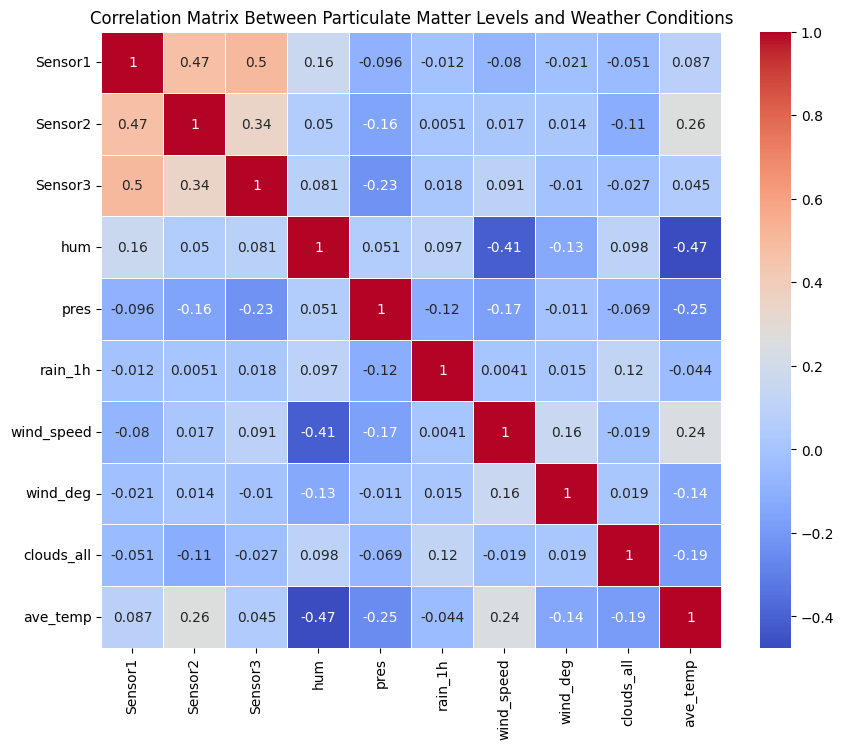

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt

# Selecting relevant columns for correlation analysis
correlation_columns = ['Sensor1', 'Sensor2', 'Sensor3', 'hum', 'pres', 'rain_1h', 'wind_speed', 'wind_deg', 'clouds_all', 'ave_temp']

# Filter the combined dataset to include only these columns
df_correlation = df_combined[correlation_columns]

# Calculate the correlation matrix
corr_matrix = df_correlation.corr()

# Plotting the heatmap for the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix Between Particulate Matter Levels and Weather Conditions')
plt.show()


That's a great idea! To investigate whether the correlation between Sensor2's particulate levels and average temperature is related to human activity, we'll use the people movement (attendance) dataset. We'll check if there's a relationship between the particulate levels and the number of people present in different areas of the town during higher temperatures.

In [31]:
# Load the people movement dataset
attendance_path = '/content/drive/MyDrive/Milan_competition/SmartCityQCWizard/unique_attendance_15/presenza_15_150824-310824.csv'
df_attendance = pd.read_csv(attendance_path)

# Display the first few rows of the dataset to verify
print("People Movement Data:")
display(df_attendance.head())

# Check for missing values and handle them if necessary
df_attendance.fillna(0, inplace=True)

# Convert the timestamp column to datetime format for merging
df_attendance['timestamp'] = pd.to_datetime(df_attendance['datetime'], errors='coerce')

# Display data types to verify the changes
print("\nPeople Movement Data Types:")
print(df_attendance.dtypes)


People Movement Data:


,datetime,value,areaAnalisi
0,2024-08-15 23:45:00,145561,Intero Comune
1,2024-08-15 23:45:00,9329,Cagliari - 008
2,2024-08-15 23:45:00,7954,Cagliari - 011
3,2024-08-15 23:45:00,7085,Cagliari - 007
4,2024-08-15 23:45:00,15030,Cagliari - 010



People Movement Data Types:
datetime               object
value                   int64
areaAnalisi            object
timestamp      datetime64[ns]
dtype: object


In [32]:
# Merge the combined particulate-weather dataset with the attendance dataset based on the nearest timestamp
df_final_combined = pd.merge_asof(
    df_combined.sort_values('timestamp'),
    df_attendance.sort_values('timestamp'),
    on='timestamp',
    direction='nearest'
)

# Display the first few rows of the final combined dataset to verify the merge
print("Final Combined Dataset Sample:")
display(df_final_combined.head())

# Check the shape of the final combined dataset
print("\nShape of the Final Combined Dataset:", df_final_combined.shape)


Final Combined Dataset Sample:


,Sensor1,Sensor2,Sensor3,timestamp,id,hum,pres,rain_1h,wind_speed,wind_deg,clouds_all,max_temp,min_temp,ave_temp,cod_weather,datetime,value,areaAnalisi
0,7.8,5.1,4.3,2024-08-01 00:00:00,41752,62,1013,0.0,1.54,360,0,28.21,25.46,27.35,800,2024-08-15 00:00:00,13335,Cagliari - 009
1,4.0,5.2,4.0,2024-08-01 00:10:00,41752,62,1013,0.0,1.54,360,0,28.21,25.46,27.35,800,2024-08-15 00:00:00,13335,Cagliari - 009
2,4.0,7.8,4.1,2024-08-01 00:20:00,41752,62,1013,0.0,1.54,360,0,28.21,25.46,27.35,800,2024-08-15 00:00:00,13335,Cagliari - 009
3,18.0,10.0,4.4,2024-08-01 00:30:00,41752,62,1013,0.0,1.54,360,0,28.21,25.46,27.35,800,2024-08-15 00:00:00,13335,Cagliari - 009
4,11.0,11.0,7.1,2024-08-01 00:40:00,41753,60,1013,0.0,1.03,0,0,27.66,24.81,26.85,800,2024-08-15 00:00:00,13335,Cagliari - 009



Shape of the Final Combined Dataset: (10005, 18)


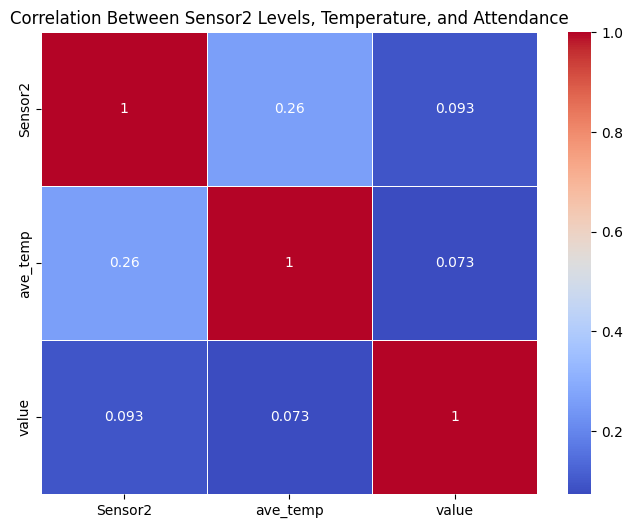

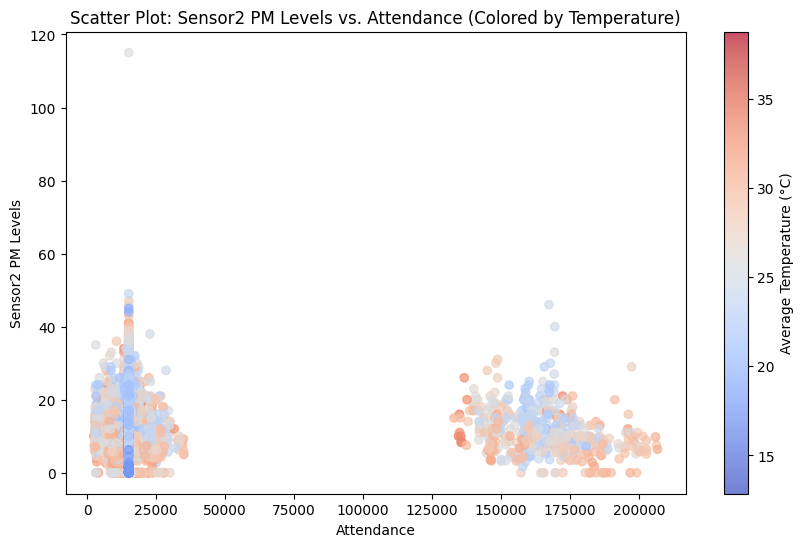

In [35]:
import seaborn as sns
import matplotlib.pyplot as plt

# Filter the dataset for the relevant columns: Sensor2 levels, average temperature, and attendance
correlation_columns = ['Sensor2', 'ave_temp', 'value']
df_analysis = df_final_combined[correlation_columns]

# Calculate the correlation matrix
corr_matrix = df_analysis.corr()

# Plotting the heatmap for the correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Between Sensor2 Levels, Temperature, and Attendance')
plt.show()

# Scatter plot to visualize the relationship between Sensor2 levels and attendance at different temperature ranges
plt.figure(figsize=(10, 6))
plt.scatter(df_final_combined['value'], df_final_combined['Sensor2'],
            c=df_final_combined['ave_temp'], cmap='coolwarm', alpha=0.7)
plt.colorbar(label='Average Temperature (°C)')
plt.xlabel('Attendance')
plt.ylabel('Sensor2 PM Levels')
plt.title('Scatter Plot: Sensor2 PM Levels vs. Attendance (Colored by Temperature)')
plt.show()


To analyze the particulate matter (PM) levels over time, we will create visualizations to observe how the PM levels change as time progresses. This time-series analysis will help identify any trends, spikes, or seasonal patterns in the particulate data.

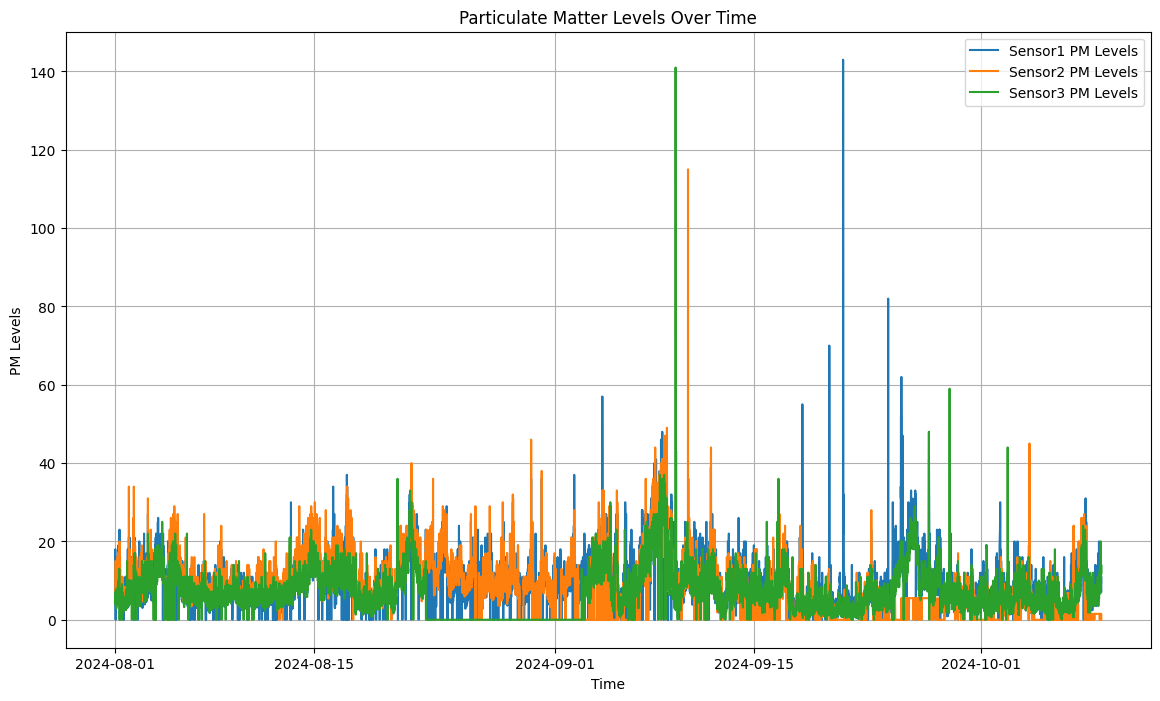

In [37]:
import matplotlib.pyplot as plt

# Ensure the 'timestamp' column is the datetime format

# Set the timestamp as the index of the DataFrame for time-series plotting
df_particulate.set_index('timestamp', inplace=True)

# Plot the PM levels for each sensor over time
plt.figure(figsize=(14, 8))
plt.plot(df_particulate.index, df_particulate['Sensor1'], label='Sensor1 PM Levels')
plt.plot(df_particulate.index, df_particulate['Sensor2'], label='Sensor2 PM Levels')
plt.plot(df_particulate.index, df_particulate['Sensor3'], label='Sensor3 PM Levels')

# Adding labels and title
plt.xlabel('Time')
plt.ylabel('PM Levels')
plt.title('Particulate Matter Levels Over Time')
plt.legend()
plt.grid(True)
plt.show()


To analyze how PM levels vary within a single day, we'll focus on plotting the particulate matter levels based on the time of day. This will allow us to observe any daily patterns, such as whether PM levels peak during specific hours (e.g., morning or evening rush hours).

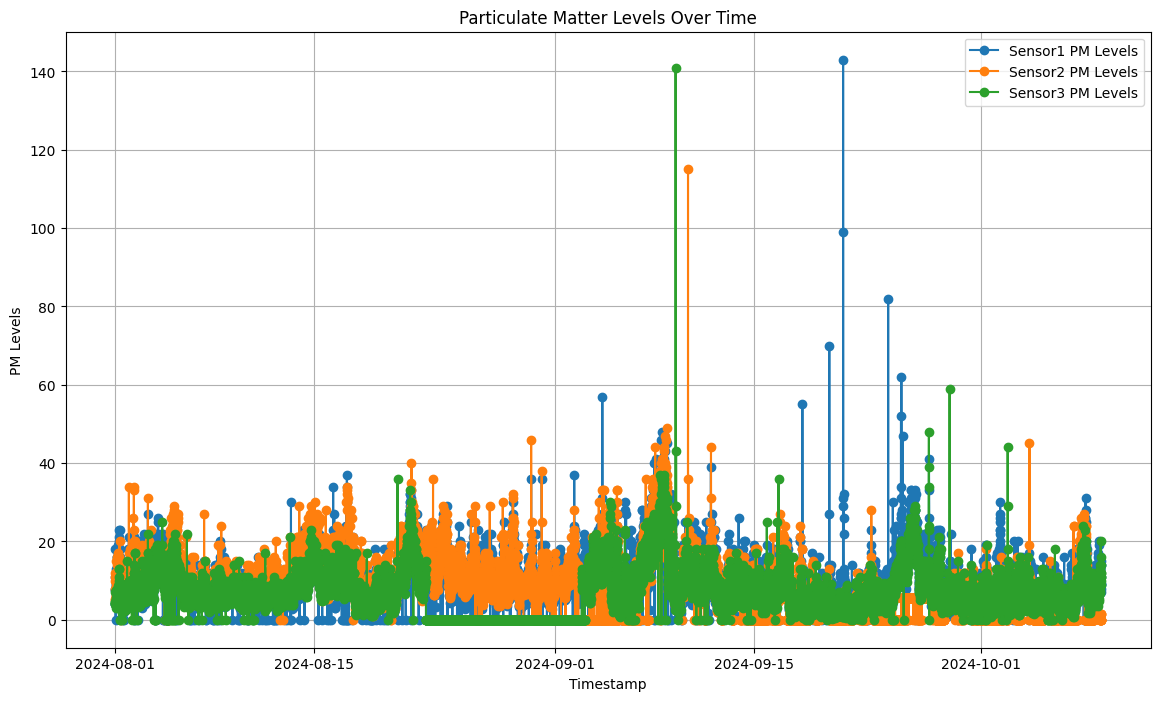

In [43]:
import matplotlib.pyplot as plt
import pandas as pd

# Convert the 'timestamp' column to datetime format

# Plot the PM levels for each sensor over the entire duration
plt.figure(figsize=(14, 8))
plt.plot(df_particulate.index, df_particulate['Sensor1'], label='Sensor1 PM Levels', marker='o', linestyle='-')
plt.plot(df_particulate.index, df_particulate['Sensor2'], label='Sensor2 PM Levels', marker='o', linestyle='-')
plt.plot(df_particulate.index, df_particulate['Sensor3'], label='Sensor3 PM Levels', marker='o', linestyle='-')

# Adding labels and title
plt.xlabel('Timestamp')
plt.ylabel('PM Levels')
plt.title('Particulate Matter Levels Over Time')
plt.grid(True)
plt.legend()
plt.show()


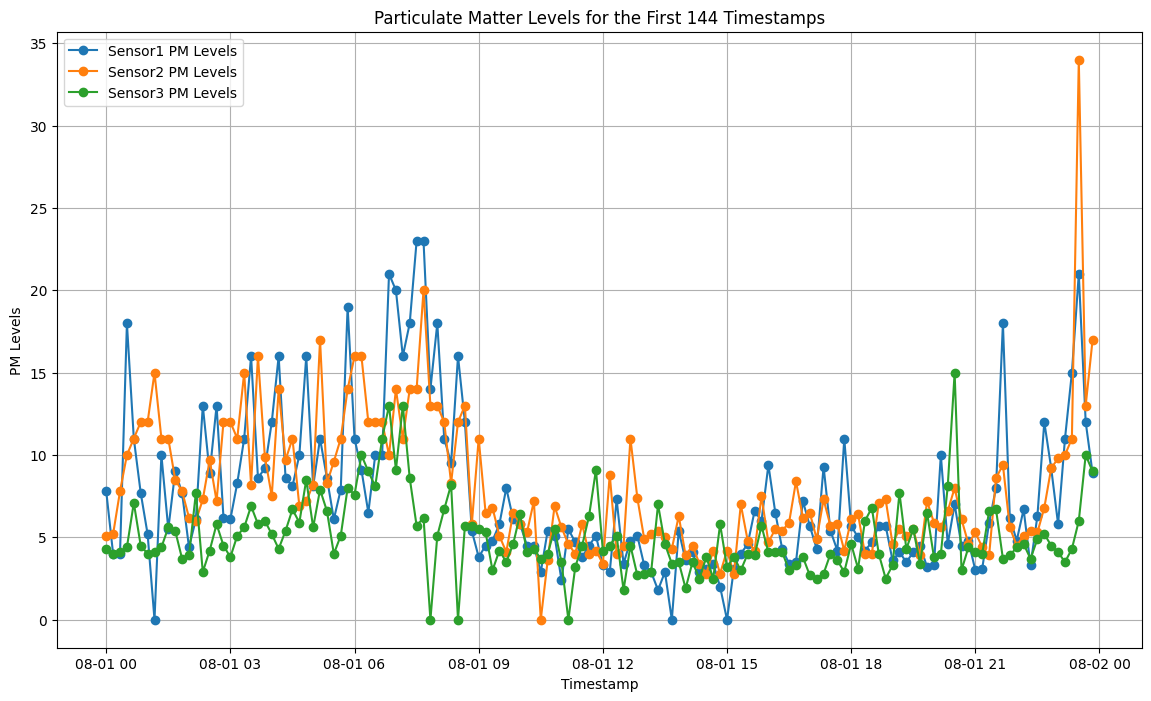

In [45]:
import matplotlib.pyplot as plt
import pandas as pd

# Convert the 'timestamp' column to datetime format

# Select the first 144 rows from the dataset
df_subset = df_particulate.head(144)

# Plot the PM levels for each sensor for the first 144 timestamps
plt.figure(figsize=(14, 8))
plt.plot(df_subset.index, df_subset['Sensor1'], label='Sensor1 PM Levels', marker='o', linestyle='-')
plt.plot(df_subset.index, df_subset['Sensor2'], label='Sensor2 PM Levels', marker='o', linestyle='-')
plt.plot(df_subset.index, df_subset['Sensor3'], label='Sensor3 PM Levels', marker='o', linestyle='-')

# Adding labels and title
plt.xlabel('Timestamp')
plt.ylabel('PM Levels')
plt.title('Particulate Matter Levels for the First 144 Timestamps')
plt.grid(True)
plt.legend()
plt.show()


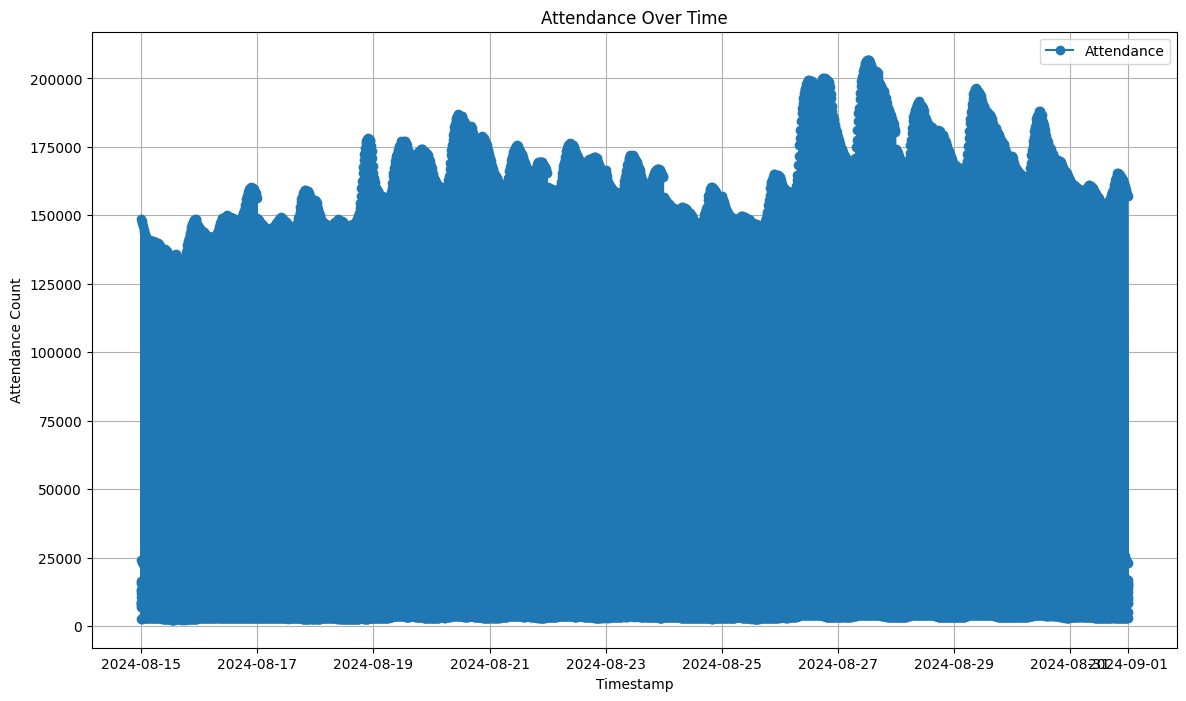

In [46]:
import matplotlib.pyplot as plt
import pandas as pd

# Convert the 'timestamp' column to datetime format
df_attendance['timestamp'] = pd.to_datetime(df_attendance['timestamp'])

# Plot the attendance values over time
plt.figure(figsize=(14, 8))
plt.plot(df_attendance['timestamp'], df_attendance['value'], label='Attendance', marker='o', linestyle='-')

# Adding labels and title
plt.xlabel('Timestamp')
plt.ylabel('Attendance Count')
plt.title('Attendance Over Time')
plt.grid(True)
plt.legend()
plt.show()


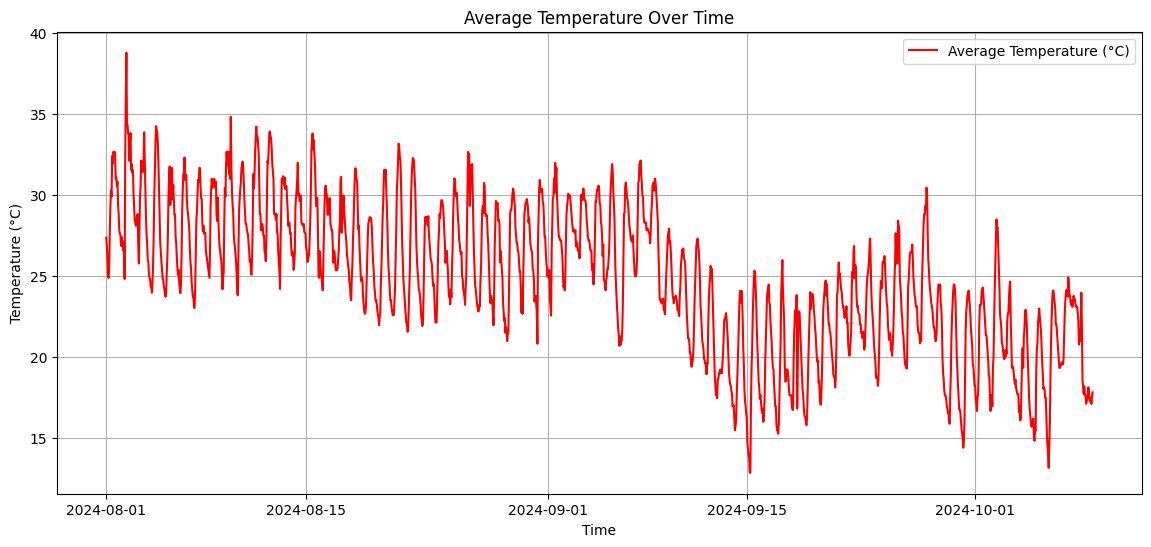

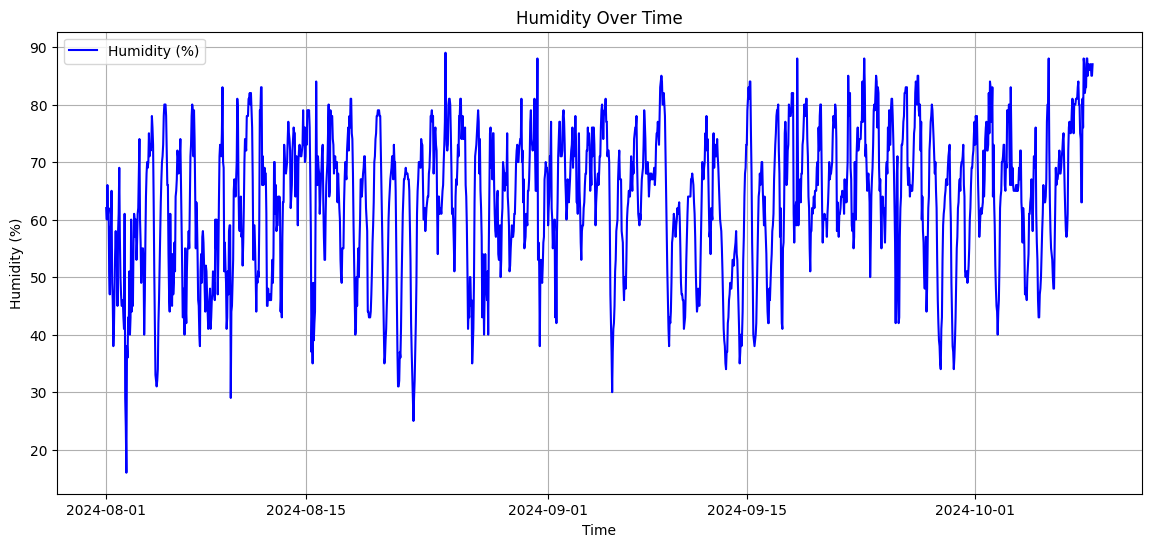

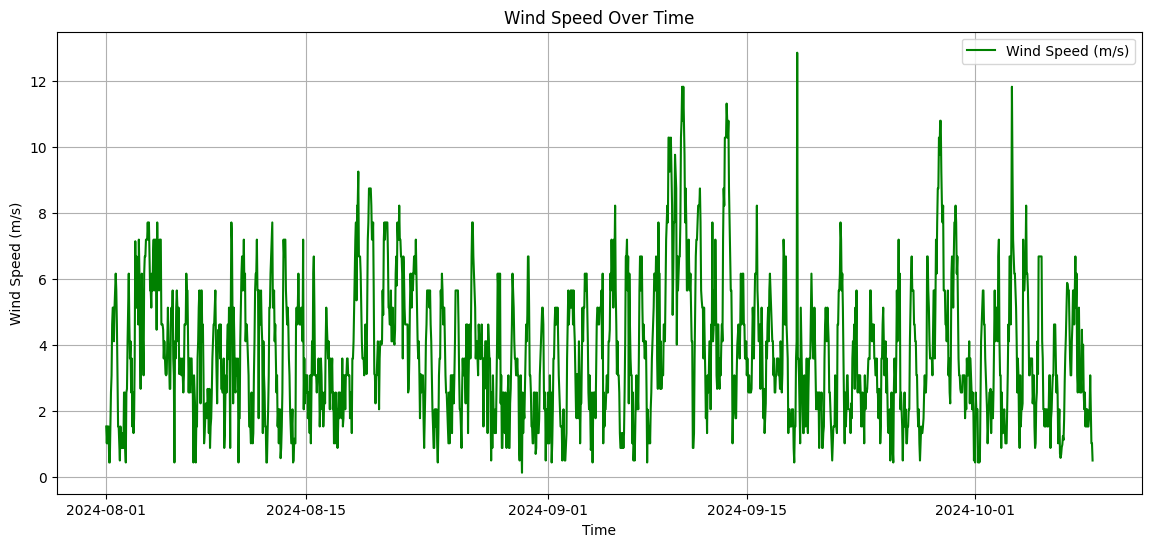

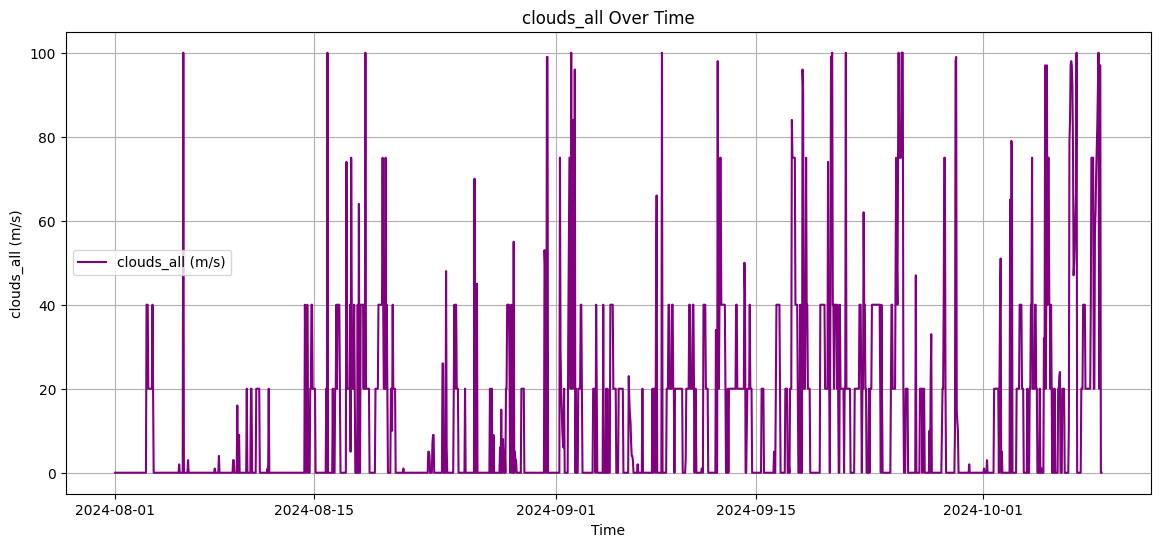

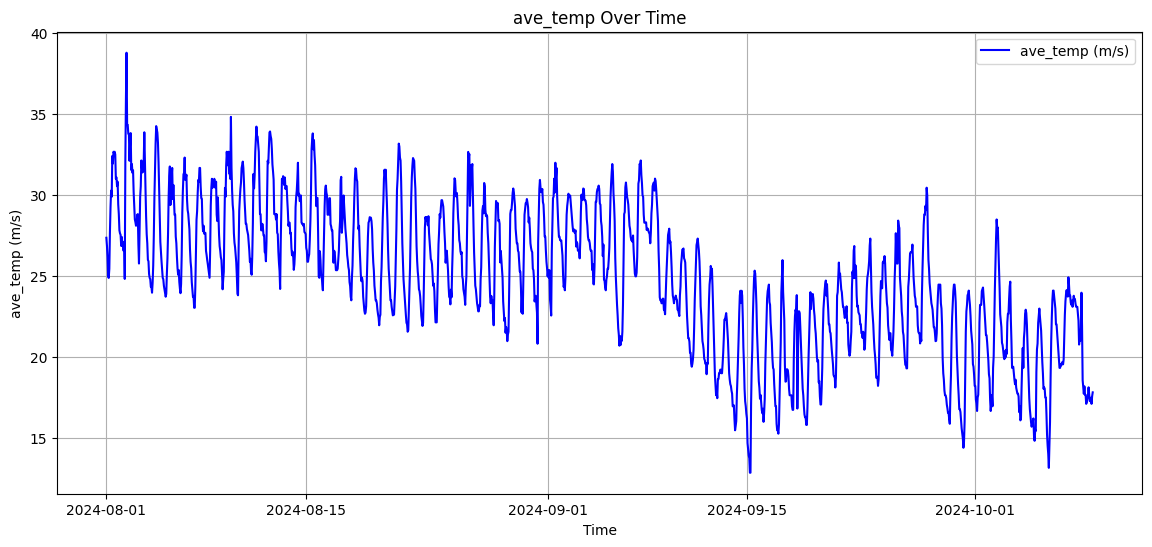

In [53]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming df_weather is your DataFrame with weather data and a 'timestamp' column
# Convert the 'timestamp' column to datetime format

# Set the timestamp as the index for easier time-based plotting

# Plot average temperature over time
plt.figure(figsize=(14, 6))
plt.plot(df_weather.index, df_weather['ave_temp'], label='Average Temperature (°C)', color='red')
plt.xlabel('Time')
plt.ylabel('Temperature (°C)')
plt.title('Average Temperature Over Time')
plt.grid(True)
plt.legend()
plt.show()

# Plot humidity over time
plt.figure(figsize=(14, 6))
plt.plot(df_weather.index, df_weather['hum'], label='Humidity (%)', color='blue')
plt.xlabel('Time')
plt.ylabel('Humidity (%)')
plt.title('Humidity Over Time')
plt.grid(True)
plt.legend()
plt.show()

# Plot wind speed over time
plt.figure(figsize=(14, 6))
plt.plot(df_weather.index, df_weather['wind_speed'], label='Wind Speed (m/s)', color='green')
plt.xlabel('Time')
plt.ylabel('Wind Speed (m/s)')
plt.title('Wind Speed Over Time')
plt.grid(True)
plt.legend()
plt.show()

# Plot wind speed over time
plt.figure(figsize=(14, 6))
plt.plot(df_weather.index, df_weather['clouds_all'], label='clouds_all (m/s)', color='purple')
plt.xlabel('Time')
plt.ylabel('clouds_all (m/s)')
plt.title('clouds_all Over Time')
plt.grid(True)
plt.legend()
plt.show()

# Plot wind speed over time
plt.figure(figsize=(14, 6))
plt.plot(df_weather.index, df_weather['ave_temp'], label='ave_temp (m/s)', color='blue')
plt.xlabel('Time')
plt.ylabel('ave_temp (m/s)')
plt.title('ave_temp Over Time')
plt.grid(True)
plt.legend()
plt.show()

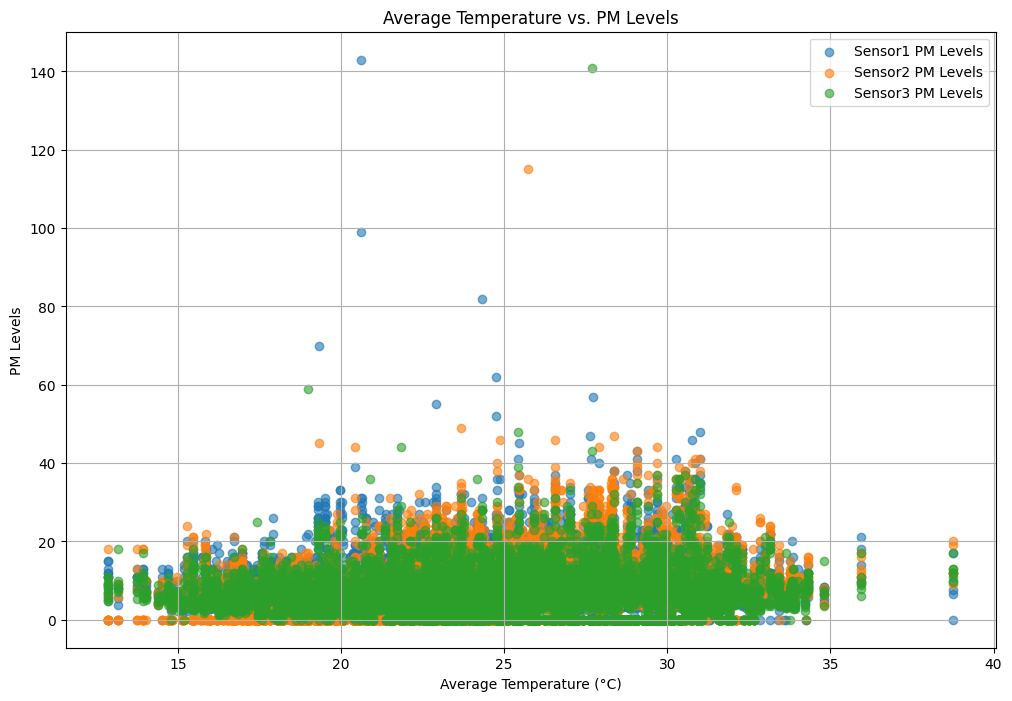

In [56]:
import matplotlib.pyplot as plt
import pandas as pd



# Merge the two DataFrames on the timestamp
df_merged = pd.merge_asof(df_particulate.sort_values('timestamp'),
                          df_weather[['ave_temp']].sort_values('timestamp'),
                          on='timestamp', direction='nearest')

# Plotting the average temperature vs. PM levels for each sensor
plt.figure(figsize=(12, 8))
plt.scatter(df_merged['ave_temp'], df_merged['Sensor1'], alpha=0.6, label='Sensor1 PM Levels')
plt.scatter(df_merged['ave_temp'], df_merged['Sensor2'], alpha=0.6, label='Sensor2 PM Levels')
plt.scatter(df_merged['ave_temp'], df_merged['Sensor3'], alpha=0.6, label='Sensor3 PM Levels')

# Adding labels and title
plt.xlabel('Average Temperature (°C)')
plt.ylabel('PM Levels')
plt.title('Average Temperature vs. PM Levels')
plt.legend()
plt.grid(True)
plt.show()


Beginning of simulating data in order to solve the problem

In [57]:
import pandas as pd
import numpy as np

# Define the time range for the simulation (e.g., daily data for 1 year)
date_range = pd.date_range(start='2024-01-01', end='2024-12-31', freq='D')

# Create an empty DataFrame with the date range
df_simulation = pd.DataFrame(date_range, columns=['Date'])

# Add columns for features
df_simulation['Season'] = np.where(df_simulation['Date'].dt.month.isin([6, 7, 8]), 'Summer',
                                   np.where(df_simulation['Date'].dt.month.isin([9, 10]), 'Fall',
                                            np.where(df_simulation['Date'].dt.month.isin([3, 4, 5]), 'Spring', 'Winter')))
df_simulation['Event_Saint_Efisio'] = np.where((df_simulation['Date'].dt.month == 5) & (df_simulation['Date'].dt.day == 1), 1, 0)


Now, we generate values for each feature using appropriate distributions:

In [58]:
# Generate synthetic cruise arrivals using a Poisson distribution (average arrivals per day = 2)
np.random.seed(0)
df_simulation['Cruise_Arrivals'] = np.random.poisson(2, len(df_simulation))

# Generate synthetic temperature values based on the month (higher in summer)
df_simulation['Temperature'] = np.where(df_simulation['Season'] == 'Summer',
                                        np.random.normal(30, 5, len(df_simulation)),
                                        np.where(df_simulation['Season'] == 'Winter',
                                                 np.random.normal(15, 3, len(df_simulation)),
                                                 np.random.normal(20, 4, len(df_simulation))))

# Simulate hotel occupancy rates (higher in summer)
df_simulation['Hotel_Occupancy'] = np.where(df_simulation['Season'] == 'Summer',
                                            np.random.normal(90, 5, len(df_simulation)),
                                            np.random.normal(70, 10, len(df_simulation)))

# Generate traffic volume index (correlated with cruise arrivals and events)
df_simulation['Traffic_Volume'] = 0.8 * df_simulation['Cruise_Arrivals'] + 0.2 * df_simulation['Event_Saint_Efisio'] + np.random.normal(0, 0.1, len(df_simulation))

# Simulate attendance at a tourist attraction
df_simulation['Attendance'] = np.where(df_simulation['Season'] == 'Summer',
                                       np.random.normal(1500, 300, len(df_simulation)),
                                       np.random.normal(800, 200, len(df_simulation)))


Add new columns to the dataset to capture the enviromental hazards

In [61]:
# Additional environmental and infrastructure columns
df_simulation['PM10'] = np.random.normal(30, 10, len(df_simulation))  # Example values for PM10 levels
df_simulation['PM2.5'] = np.random.normal(15, 5, len(df_simulation))  # Example values for PM2.5 levels
df_simulation['NO2'] = np.random.normal(20, 8, len(df_simulation))    # Example NO2 levels
df_simulation['CO'] = np.random.normal(0.5, 0.2, len(df_simulation))  # Example CO levels
df_simulation['Noise_Level'] = np.random.normal(60, 10, len(df_simulation))  # Example noise pollution index
df_simulation['Waste_Generated'] = np.random.normal(50, 15, len(df_simulation))  # Waste generation per day (tons)
df_simulation['Water_Usage'] = np.random.normal(500, 100, len(df_simulation))  # Water usage in cubic meters per day


In [62]:
# Example: Adjust pollutant levels based on tourist attendance and events
df_simulation['PM10'] += 0.05 * df_simulation['Attendance']
df_simulation['PM2.5'] += 0.03 * df_simulation['Attendance']
df_simulation['NO2'] += 0.1 * df_simulation['Cruise_Arrivals']
df_simulation['CO'] += 0.05 * df_simulation['Traffic_Volume']


Define overtourism

In [63]:
# Define overtourism and environmental hazard thresholds
df_simulation['Environmental_Hazard'] = np.where((df_simulation['PM10'] > 50) |
                                                 (df_simulation['Noise_Level'] > 70), 1, 0)

# Combine overtourism and environmental hazard to define critical alert situations
df_simulation['Critical_Alert'] = np.where((df_simulation['Overtourism'] == 1) &
                                           (df_simulation['Environmental_Hazard'] == 1), 1, 0)


We can visualize some of the generated data to ensure it looks realistic:



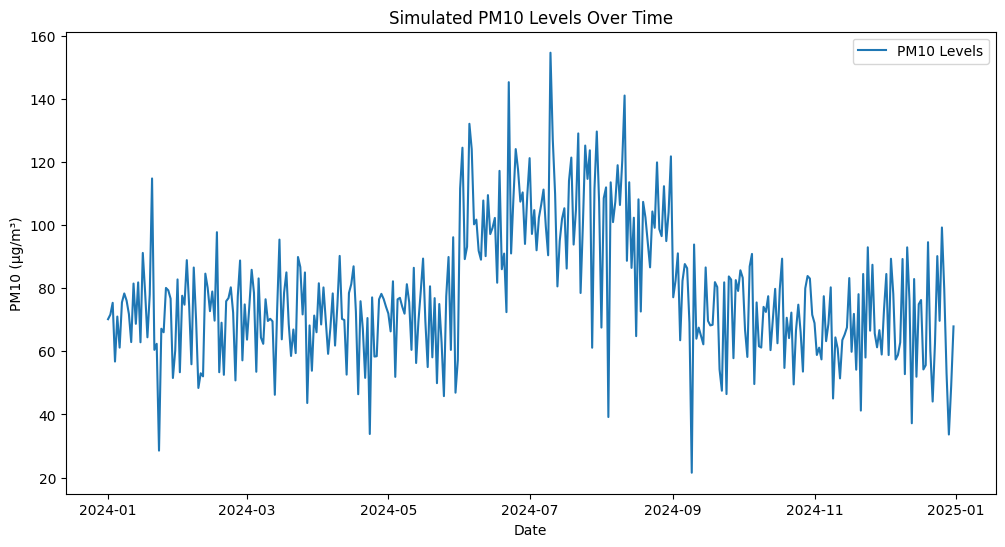

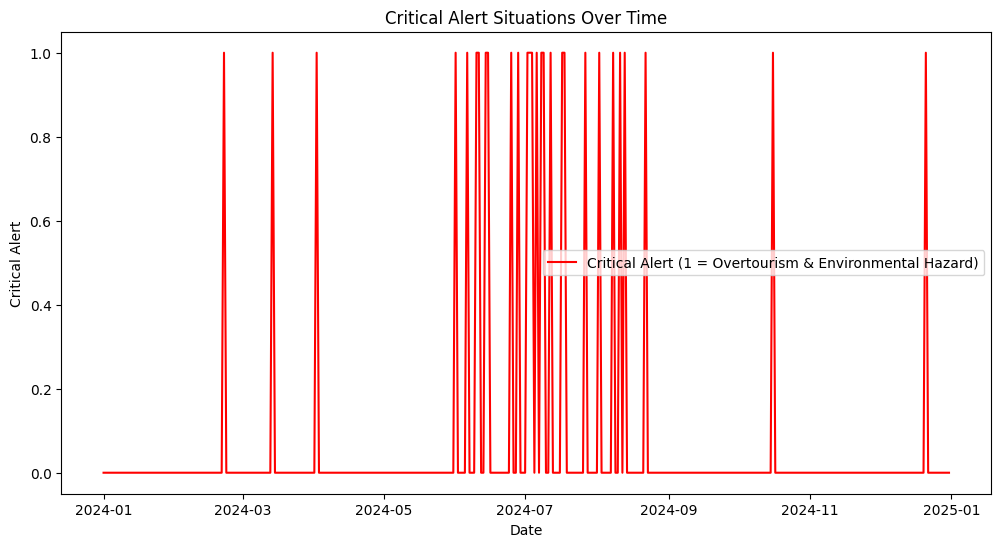

In [64]:
import matplotlib.pyplot as plt

# Plot PM10 levels over time
plt.figure(figsize=(12, 6))
plt.plot(df_simulation['Date'], df_simulation['PM10'], label='PM10 Levels')
plt.xlabel('Date')
plt.ylabel('PM10 (µg/m³)')
plt.title('Simulated PM10 Levels Over Time')
plt.legend()
plt.show()

# Plot the critical alert situations over time
plt.figure(figsize=(12, 6))
plt.plot(df_simulation['Date'], df_simulation['Critical_Alert'], label='Critical Alert (1 = Overtourism & Environmental Hazard)', color='red')
plt.xlabel('Date')
plt.ylabel('Critical Alert')
plt.title('Critical Alert Situations Over Time')
plt.legend()
plt.show()


**Improved Code**

In [80]:
import pandas as pd
import numpy as np

# Create a date range for the simulation: daily data for one year
date_range = pd.date_range(start='2024-01-01', end='2024-12-31', freq='D')
df_simulation = pd.DataFrame(date_range, columns=['Date'])

# 1. Seasonality (Month and Season)
df_simulation['Month'] = df_simulation['Date'].dt.month
df_simulation['Season'] = np.where(df_simulation['Month'].isin([6, 7, 8]), 'Summer',
                                   np.where(df_simulation['Month'].isin([9, 10]), 'Fall',
                                            np.where(df_simulation['Month'].isin([3, 4, 5]), 'Spring', 'Winter')))

# 2. Events (Saint Efisio festival and other events)
df_simulation['Event_Saint_Efisio'] = np.where((df_simulation['Date'].dt.month == 5) & (df_simulation['Date'].dt.day == 1), 1, 0)

# 3. Cruise Ship Arrivals
np.random.seed(0)
df_simulation['Cruise_Arrivals'] = np.random.poisson(2, len(df_simulation))

# 4. Weather Conditions
# Temperature varies by season, higher in summer and lower in winter
df_simulation['Temperature'] = np.where(df_simulation['Season'] == 'Summer',
                                        np.random.normal(30, 5, len(df_simulation)),
                                        np.where(df_simulation['Season'] == 'Winter',
                                                 np.random.normal(15, 3, len(df_simulation)),
                                                 np.random.normal(20, 4, len(df_simulation))))
# Humidity, wind speed, and precipitation can also vary by season
df_simulation['Humidity'] = np.where(df_simulation['Season'] == 'Summer',
                                     np.random.normal(60, 10, len(df_simulation)),
                                     np.random.normal(75, 10, len(df_simulation)))

df_simulation['Wind_Speed'] = np.random.normal(5, 1.5, len(df_simulation))
df_simulation['Precipitation'] = np.random.normal(1, 0.5, len(df_simulation))

# 5. Accommodation Availability (Occupancy Rates)
df_simulation['Hotel_Occupancy'] = np.where(df_simulation['Season'] == 'Summer',
                                            np.random.normal(90, 5, len(df_simulation)),
                                            np.random.normal(70, 10, len(df_simulation)))

# 6. Traffic Volume
df_simulation['Traffic_Volume'] = 0.8 * df_simulation['Cruise_Arrivals'] + np.random.normal(1, 0.2, len(df_simulation))

# 7. Tourist Attendance (Simulate attendance at key attractions)
df_simulation['Tourist_Attendance'] = np.where(df_simulation['Season'] == 'Summer',
                                               np.random.normal(1500, 300, len(df_simulation)),
                                               np.random.normal(800, 200, len(df_simulation)))

# 8. Environmental Metrics (PM10, PM2.5, NO2, CO)
df_simulation['PM10'] = np.random.normal(30, 10, len(df_simulation))
df_simulation['PM2.5'] = np.random.normal(15, 5, len(df_simulation))
df_simulation['NO2'] = np.random.normal(20, 8, len(df_simulation))
df_simulation['CO'] = np.random.normal(0.5, 0.2, len(df_simulation))

# Display the first few rows of the dataset
df_simulation.head()


,Date,Month,Season,Event_Saint_Efisio,Cruise_Arrivals,Temperature,Humidity,Wind_Speed,Precipitation,Hotel_Occupancy,Traffic_Volume,Tourist_Attendance,PM10,PM2.5,NO2,CO
0,2024-01-01,1,Winter,0,3,17.203115,75.198239,5.859354,0.866507,62.088021,3.383327,688.784083,24.460306,6.057925,4.797621,0.905913
1,2024-01-02,1,Winter,0,2,19.124945,84.355471,2.445900,1.181091,74.032523,2.764886,585.449450,38.548849,9.584493,21.403291,0.657449
2,2024-01-03,1,Winter,0,5,17.209140,70.543022,5.314027,1.372098,84.987843,5.411453,1163.586413,9.861310,15.927495,15.518290,0.505301
3,2024-01-04,1,Winter,0,1,17.216283,76.043788,5.545700,0.592107,54.383736,1.731862,832.644016,28.968989,6.865005,31.545296,0.748204
4,2024-01-05,1,Winter,0,0,16.324602,70.895212,4.573823,0.705039,88.528208,1.004364,1001.707139,26.029634,17.682058,28.882209,0.300727


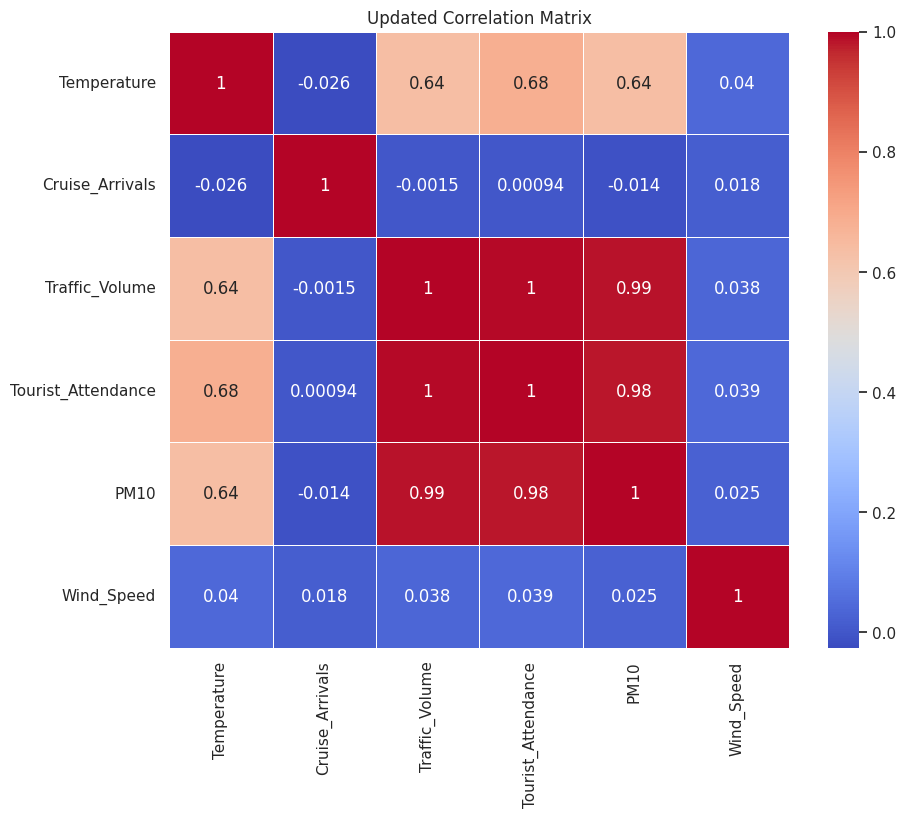

In [81]:
# Correlating Traffic Volume with Tourist Attendance and Cruise Arrivals
df_simulation['Traffic_Volume'] = (0.8 * df_simulation['Tourist_Attendance'] +
                                   0.5 * df_simulation['Cruise_Arrivals'] +
                                   np.random.normal(1, 0.2, len(df_simulation)))

# Correlating PM10 levels with Traffic Volume and Temperature
df_simulation['PM10'] += (0.2 * df_simulation['Traffic_Volume'] +
                          0.1 * df_simulation['Temperature'] -
                          0.1 * df_simulation['Wind_Speed'])

# Correlating Tourist Attendance with Temperature
df_simulation['Tourist_Attendance'] += np.where(df_simulation['Season'] == 'Summer',
                                                df_simulation['Temperature'] * 5, 0)

# Display the updated correlation matrix
correlation_matrix = df_simulation[['Temperature', 'Cruise_Arrivals', 'Traffic_Volume',
                                    'Tourist_Attendance', 'PM10', 'Wind_Speed']].corr()

import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Updated Correlation Matrix')
plt.show()


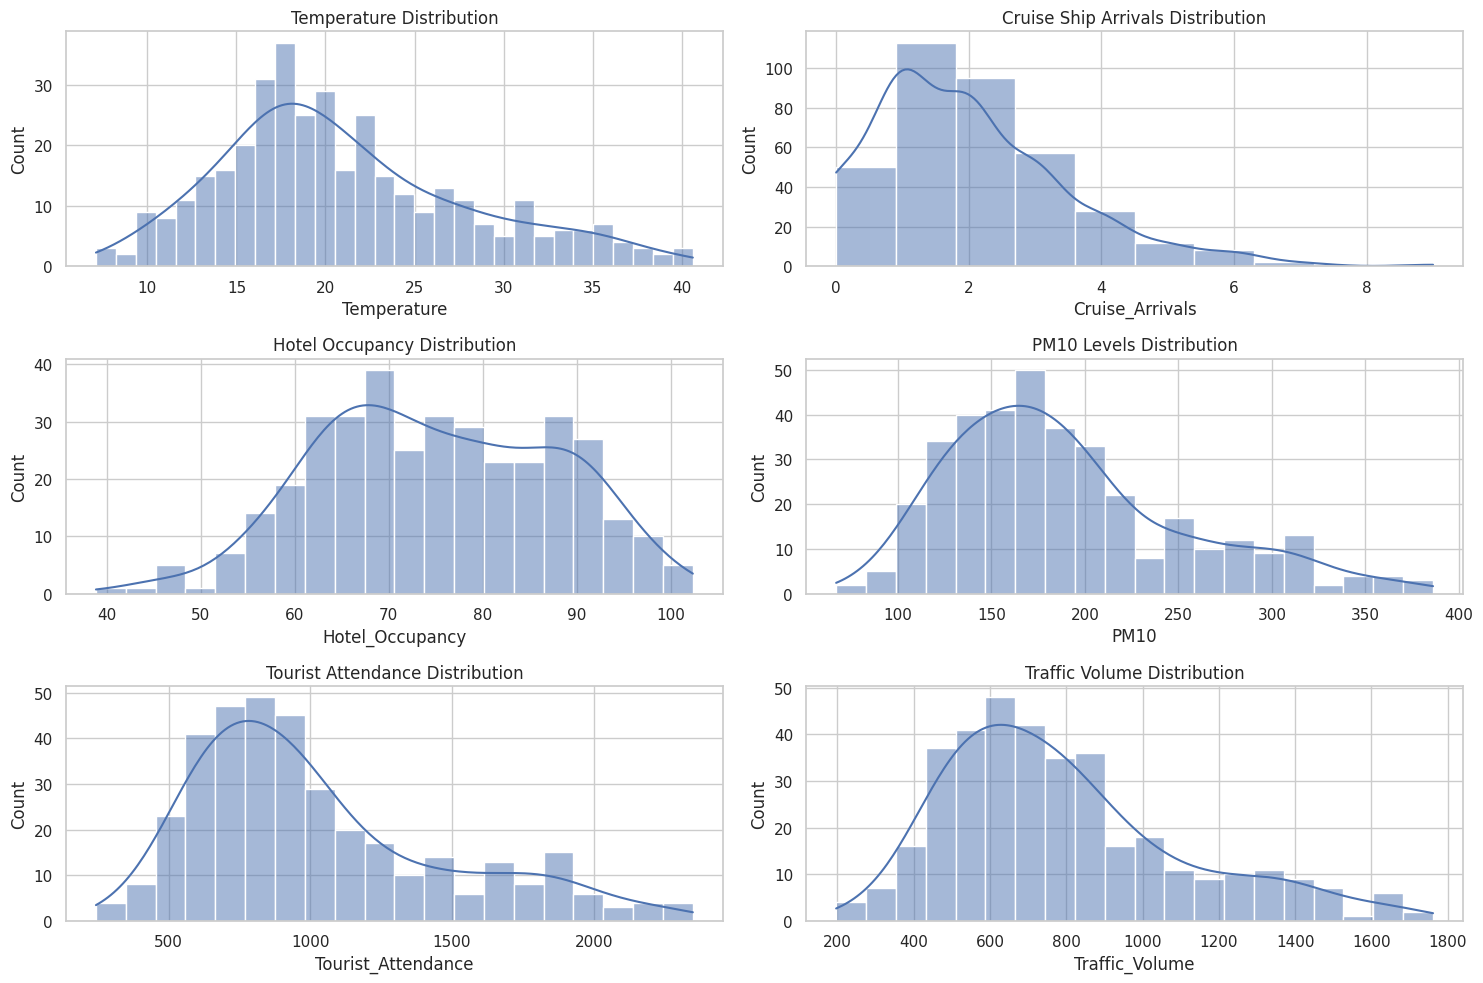

In [82]:
import seaborn as sns
import matplotlib.pyplot as plt

# Setting up the plot style
sns.set(style="whitegrid")

# Visualize distributions of key variables
plt.figure(figsize=(15, 10))

# Temperature Distribution
plt.subplot(3, 2, 1)
sns.histplot(df_simulation['Temperature'], bins=30, kde=True)
plt.title('Temperature Distribution')

# Cruise Ship Arrivals Distribution
plt.subplot(3, 2, 2)
sns.histplot(df_simulation['Cruise_Arrivals'], bins=10, kde=True)
plt.title('Cruise Ship Arrivals Distribution')

# Hotel Occupancy Distribution
plt.subplot(3, 2, 3)
sns.histplot(df_simulation['Hotel_Occupancy'], bins=20, kde=True)
plt.title('Hotel Occupancy Distribution')

# PM10 Levels Distribution
plt.subplot(3, 2, 4)
sns.histplot(df_simulation['PM10'], bins=20, kde=True)
plt.title('PM10 Levels Distribution')

# Tourist Attendance Distribution
plt.subplot(3, 2, 5)
sns.histplot(df_simulation['Tourist_Attendance'], bins=20, kde=True)
plt.title('Tourist Attendance Distribution')

# Traffic Volume Distribution
plt.subplot(3, 2, 6)
sns.histplot(df_simulation['Traffic_Volume'], bins=20, kde=True)
plt.title('Traffic Volume Distribution')

plt.tight_layout()
plt.show()


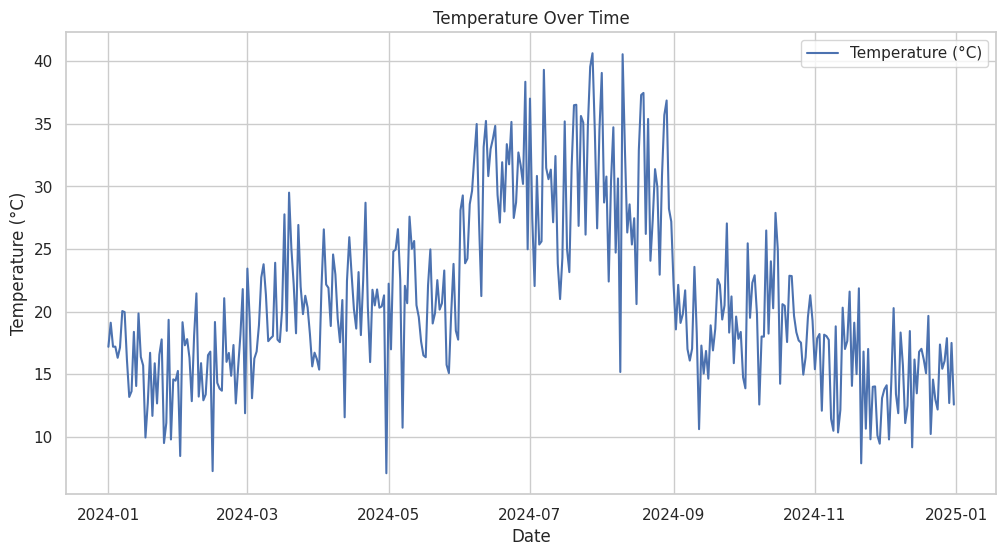

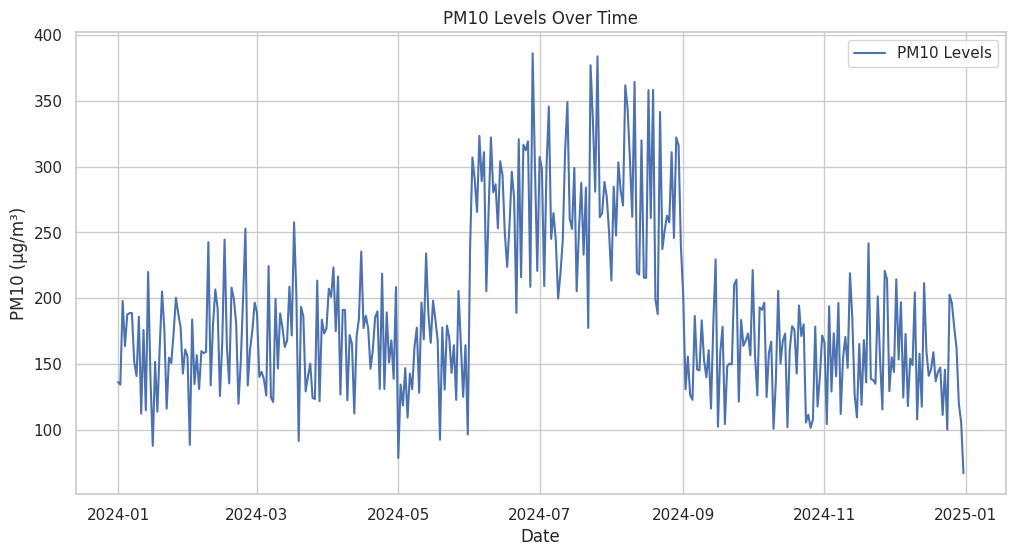

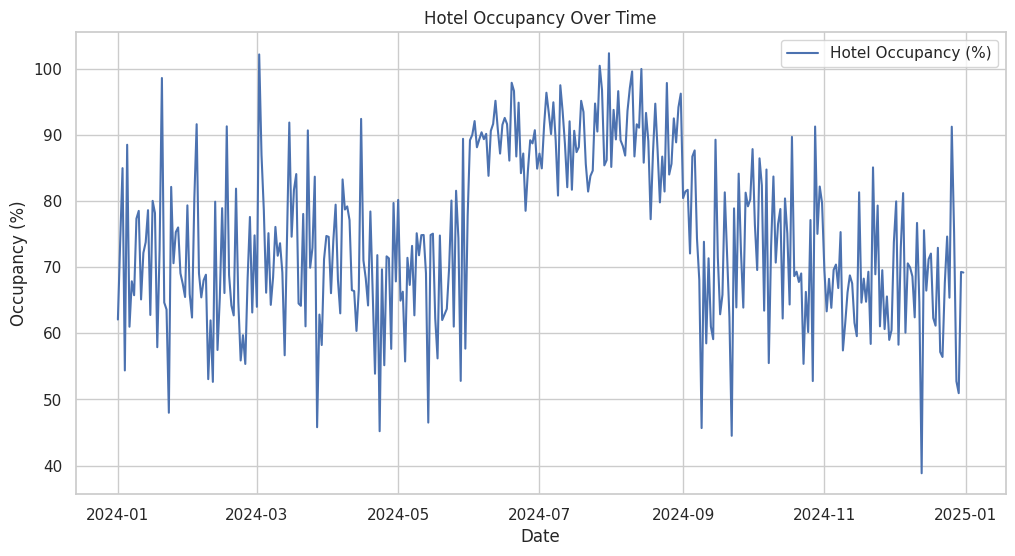

In [83]:
# Plotting time series of key variables to observe patterns over time

# Temperature over time
plt.figure(figsize=(12, 6))
plt.plot(df_simulation['Date'], df_simulation['Temperature'], label='Temperature (°C)')
plt.xlabel('Date')
plt.ylabel('Temperature (°C)')
plt.title('Temperature Over Time')
plt.legend()
plt.show()

# PM10 levels over time
plt.figure(figsize=(12, 6))
plt.plot(df_simulation['Date'], df_simulation['PM10'], label='PM10 Levels')
plt.xlabel('Date')
plt.ylabel('PM10 (µg/m³)')
plt.title('PM10 Levels Over Time')
plt.legend()
plt.show()

# Hotel occupancy over time
plt.figure(figsize=(12, 6))
plt.plot(df_simulation['Date'], df_simulation['Hotel_Occupancy'], label='Hotel Occupancy (%)')
plt.xlabel('Date')
plt.ylabel('Occupancy (%)')
plt.title('Hotel Occupancy Over Time')
plt.legend()
plt.show()


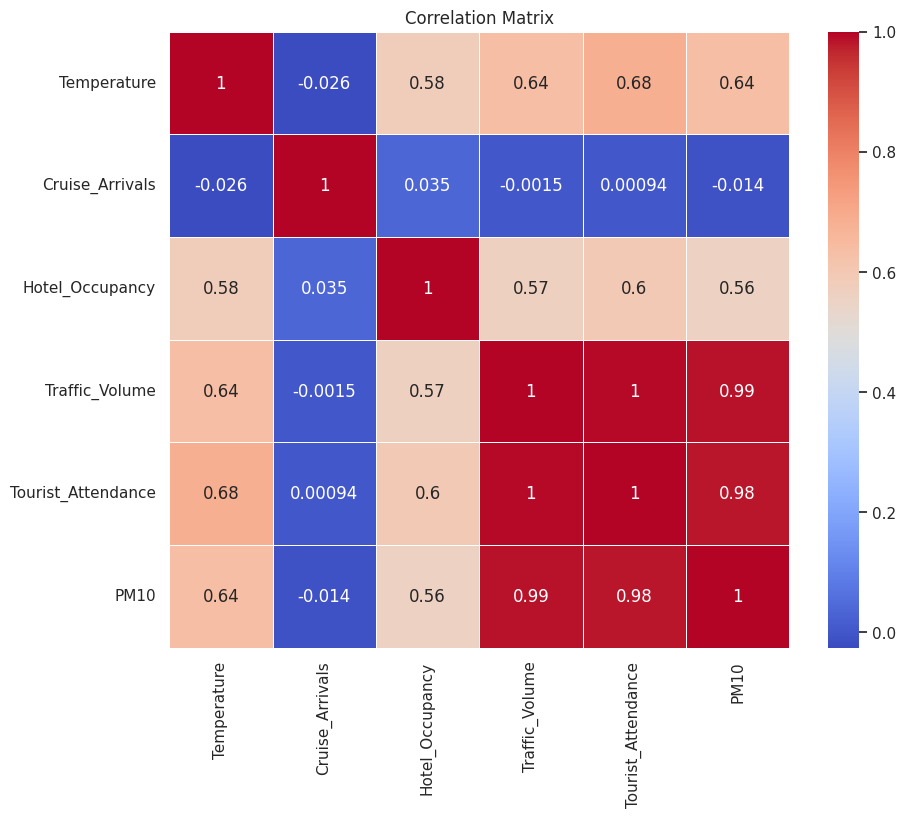

In [84]:
# Calculate and visualize the correlation matrix
correlation_matrix = df_simulation[['Temperature', 'Cruise_Arrivals', 'Hotel_Occupancy',
                                    'Traffic_Volume', 'Tourist_Attendance', 'PM10']].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()


In [85]:
# Define thresholds for overtourism and environmental hazard
overtourism_threshold_attendance = 2000
overtourism_threshold_cruise_arrivals = 3
overtourism_threshold_hotel_occupancy = 85
environmental_hazard_threshold_pm10 = 50
environmental_hazard_threshold_traffic = 2.5
temperature_threshold = 35

# Create overtourism label based on multiple conditions
df_simulation['Overtourism'] = np.where((df_simulation['Tourist_Attendance'] > overtourism_threshold_attendance) &
                                        (df_simulation['Cruise_Arrivals'] > overtourism_threshold_cruise_arrivals) &
                                        (df_simulation['Hotel_Occupancy'] > overtourism_threshold_hotel_occupancy), 1, 0)

# Create environmental hazard label
df_simulation['Environmental_Hazard'] = np.where((df_simulation['PM10'] > environmental_hazard_threshold_pm10) &
                                                 (df_simulation['Traffic_Volume'] > environmental_hazard_threshold_traffic) &
                                                 (df_simulation['Temperature'] > temperature_threshold), 1, 0)

# Create critical alert label if both overtourism and environmental hazard are true
df_simulation['Critical_Alert'] = np.where((df_simulation['Overtourism'] == 1) &
                                           (df_simulation['Environmental_Hazard'] == 1), 1, 0)

# Display the counts of each label type
overtourism_count = df_simulation['Overtourism'].sum()
environmental_hazard_count = df_simulation['Environmental_Hazard'].sum()
critical_alert_count = df_simulation['Critical_Alert'].sum()

print(f"Overtourism instances: {overtourism_count}")
print(f"Environmental Hazard instances: {environmental_hazard_count}")
print(f"Critical Alert instances: {critical_alert_count}")


Overtourism instances: 2
Environmental Hazard instances: 19
Critical Alert instances: 0


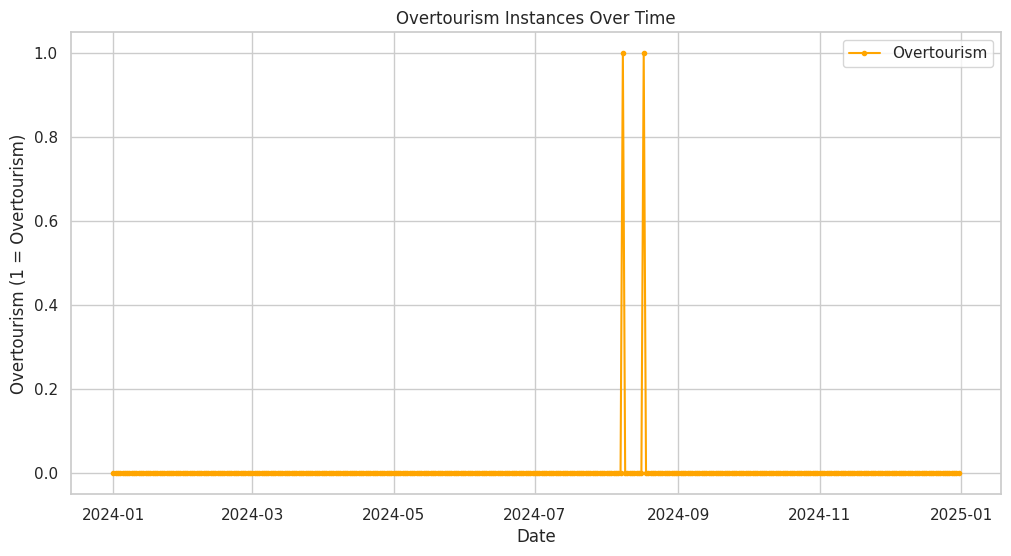

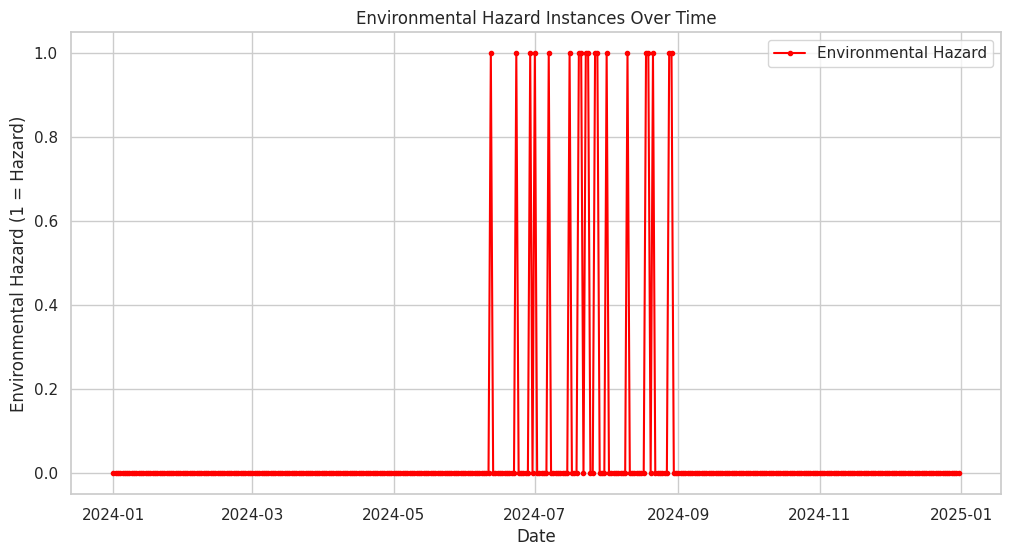

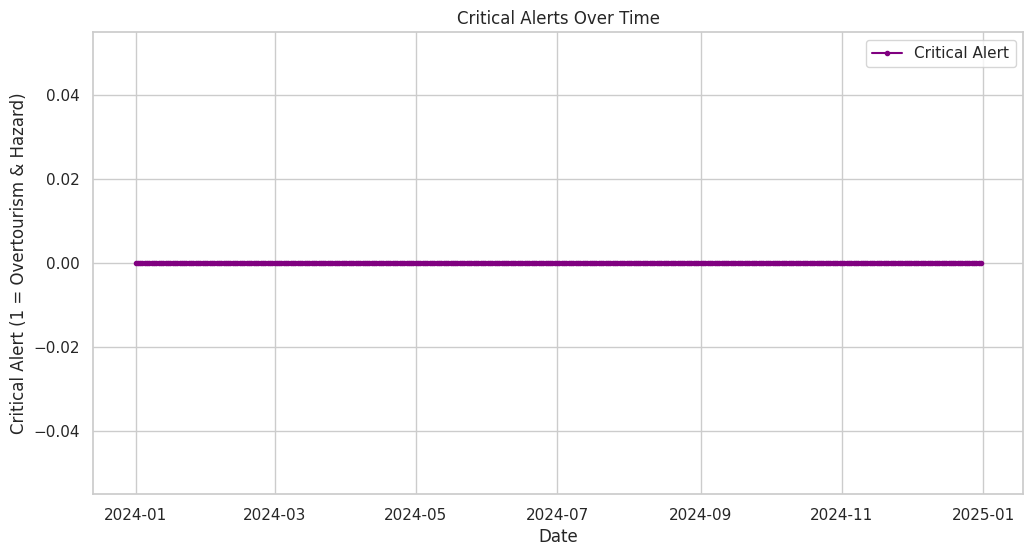

In [86]:
import matplotlib.pyplot as plt

# Visualize the instances of overtourism over time
plt.figure(figsize=(12, 6))
plt.plot(df_simulation['Date'], df_simulation['Overtourism'], label='Overtourism', color='orange', linestyle='-', marker='.')
plt.xlabel('Date')
plt.ylabel('Overtourism (1 = Overtourism)')
plt.title('Overtourism Instances Over Time')
plt.legend()
plt.show()

# Visualize the instances of environmental hazards over time
plt.figure(figsize=(12, 6))
plt.plot(df_simulation['Date'], df_simulation['Environmental_Hazard'], label='Environmental Hazard', color='red', linestyle='-', marker='.')
plt.xlabel('Date')
plt.ylabel('Environmental Hazard (1 = Hazard)')
plt.title('Environmental Hazard Instances Over Time')
plt.legend()
plt.show()

# Visualize the instances of critical alerts over time
plt.figure(figsize=(12, 6))
plt.plot(df_simulation['Date'], df_simulation['Critical_Alert'], label='Critical Alert', color='purple', linestyle='-', marker='.')
plt.xlabel('Date')
plt.ylabel('Critical Alert (1 = Overtourism & Hazard)')
plt.title('Critical Alerts Over Time')
plt.legend()
plt.show()


In [90]:
# 1. Different Types of Events: Cultural Festivals and Concerts
# Assume cultural festivals happen during spring and summer, and concerts happen randomly
df_simulation['Event_Cultural_Festival'] = np.where((df_simulation['Season'].isin(['Spring', 'Summer'])) &
                                                   (np.random.rand(len(df_simulation)) < 0.05), 1, 0)
df_simulation['Event_Concert'] = np.where((np.random.rand(len(df_simulation)) < 0.03), 1, 0)

# 2. Noise Pollution: Higher during events and high traffic
df_simulation['Noise_Level'] = (50 +
                                10 * df_simulation['Traffic_Volume'] +
                                20 * (df_simulation['Event_Saint_Efisio'] + df_simulation['Event_Cultural_Festival'] + df_simulation['Event_Concert']) +
                                np.random.normal(0, 5, len(df_simulation)))

# 3. Public Transportation Usage: Correlated with tourist attendance and event days
df_simulation['Public_Transport_Usage'] = (500 +
                                           0.5 * df_simulation['Tourist_Attendance'] +
                                           100 * (df_simulation['Event_Saint_Efisio'] + df_simulation['Event_Cultural_Festival']) +
                                           np.random.normal(50, 20, len(df_simulation)))

# 4. Water and Energy Usage: Higher in summer and during high tourist periods
df_simulation['Water_Usage'] = (300 +
                                0.3 * df_simulation['Tourist_Attendance'] +
                                np.where(df_simulation['Season'] == 'Summer', 100, 50) +
                                np.random.normal(20, 10, len(df_simulation)))

df_simulation['Energy_Usage'] = (400 +
                                 0.4 * df_simulation['Tourist_Attendance'] +
                                 np.where(df_simulation['Season'] == 'Summer', 200, 100) +
                                 np.random.normal(30, 15, len(df_simulation)))

# 5. Beach Occupancy: Varies with weather conditions (temperature) and tourist numbers
df_simulation['Beach_Occupancy'] = np.where(
    df_simulation['Season'] == 'Summer',
    df_simulation['Tourist_Attendance'] * 0.6 + df_simulation['Temperature'] * 5 + np.random.normal(50, 20, len(df_simulation)),
    df_simulation['Tourist_Attendance'] * 0.2 + np.random.normal(20, 10, len(df_simulation))
)

# Display the first few rows of the updated dataset
df_simulation.head()


,Date,Month,Season,Event_Saint_Efisio,Cruise_Arrivals,Temperature,Humidity,Wind_Speed,Precipitation,Hotel_Occupancy,...,Overtourism,Environmental_Hazard,Critical_Alert,Event_Cultural_Festival,Event_Concert,Noise_Level,Public_Transport_Usage,Water_Usage,Energy_Usage,Beach_Occupancy
0,2024-01-01,1,Winter,0,3,17.203115,75.198239,5.859354,0.866507,62.088021,...,0,0,0,0,0,4216.034889,920.331933,584.706451,791.685736,158.483622
1,2024-01-02,1,Winter,0,2,19.124945,84.355471,2.445900,1.181091,74.032523,...,0,0,0,0,0,3588.028663,842.267364,535.899373,749.120420,132.974959
2,2024-01-03,1,Winter,0,5,17.209140,70.543022,5.314027,1.372098,84.987843,...,0,0,0,0,0,7074.473401,1111.807162,723.839502,998.543575,251.824941
3,2024-01-04,1,Winter,0,1,17.216283,76.043788,5.545700,0.592107,54.383736,...,0,0,0,0,0,5070.870366,956.226509,624.847906,864.097771,186.153097
4,2024-01-05,1,Winter,0,0,16.324602,70.895212,4.573823,0.705039,88.528208,...,0,0,0,0,0,6068.899729,1067.665970,681.114241,919.856792,203.029415


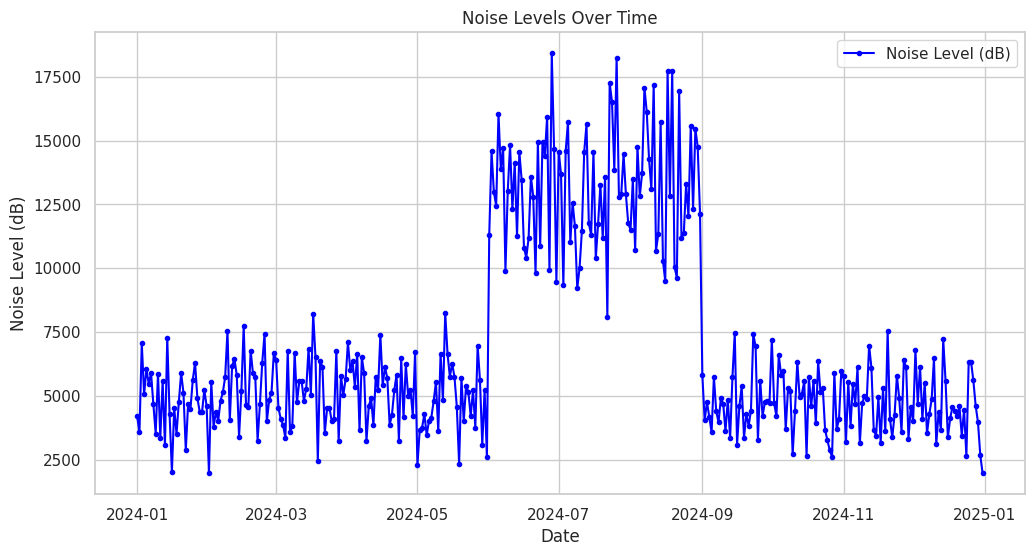

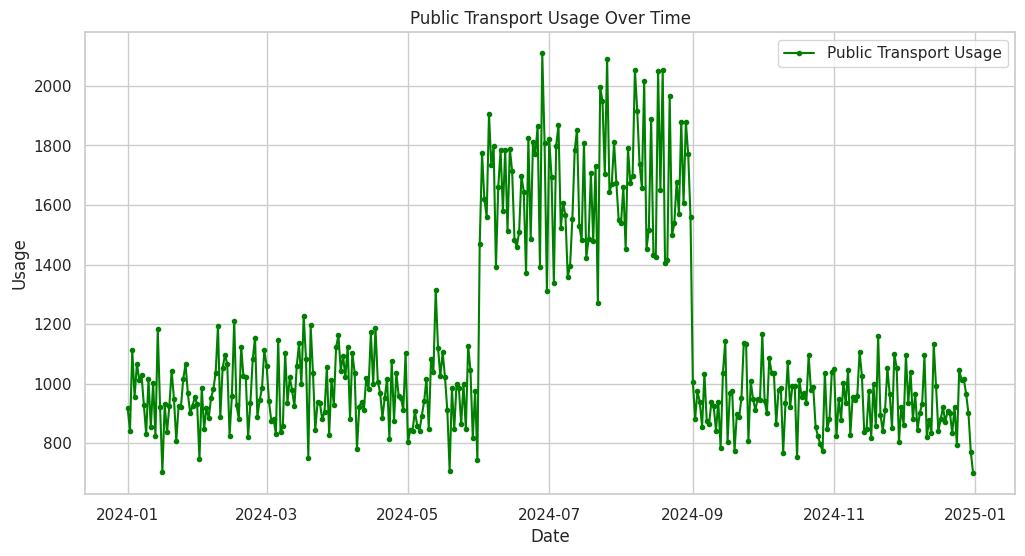

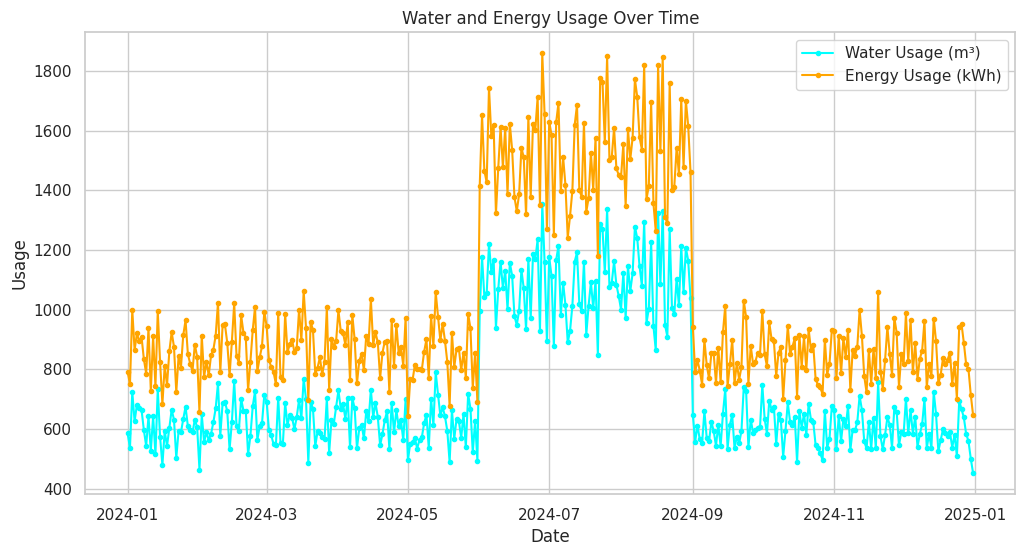

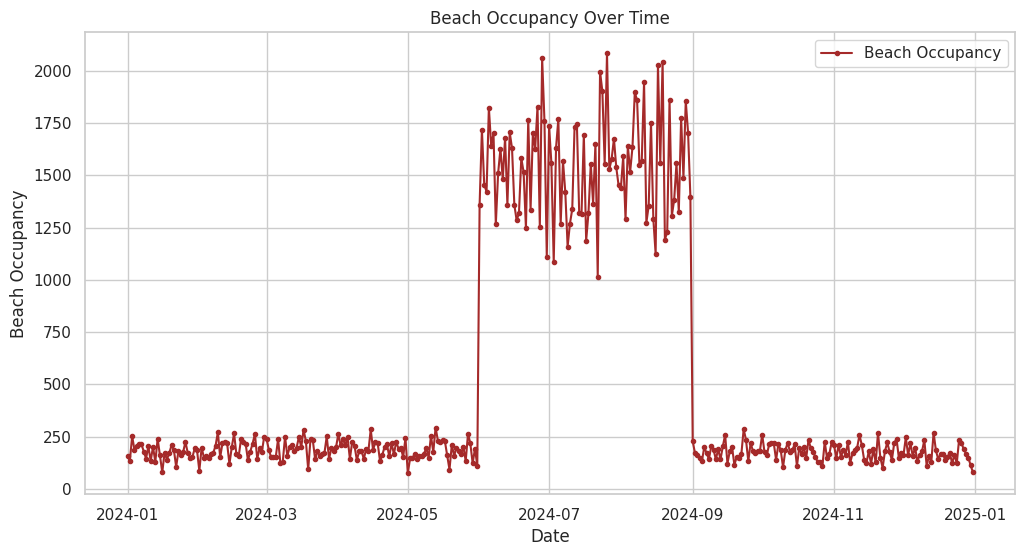

In [91]:
import matplotlib.pyplot as plt

# Plot Noise Levels over time
plt.figure(figsize=(12, 6))
plt.plot(df_simulation['Date'], df_simulation['Noise_Level'], label='Noise Level (dB)', color='blue', linestyle='-', marker='.')
plt.xlabel('Date')
plt.ylabel('Noise Level (dB)')
plt.title('Noise Levels Over Time')
plt.legend()
plt.show()

# Plot Public Transport Usage over time
plt.figure(figsize=(12, 6))
plt.plot(df_simulation['Date'], df_simulation['Public_Transport_Usage'], label='Public Transport Usage', color='green', linestyle='-', marker='.')
plt.xlabel('Date')
plt.ylabel('Usage')
plt.title('Public Transport Usage Over Time')
plt.legend()
plt.show()

# Plot Water and Energy Usage over time
plt.figure(figsize=(12, 6))
plt.plot(df_simulation['Date'], df_simulation['Water_Usage'], label='Water Usage (m³)', color='aqua', linestyle='-', marker='.')
plt.plot(df_simulation['Date'], df_simulation['Energy_Usage'], label='Energy Usage (kWh)', color='orange', linestyle='-', marker='.')
plt.xlabel('Date')
plt.ylabel('Usage')
plt.title('Water and Energy Usage Over Time')
plt.legend()
plt.show()

# Plot Beach Occupancy over time
plt.figure(figsize=(12, 6))
plt.plot(df_simulation['Date'], df_simulation['Beach_Occupancy'], label='Beach Occupancy', color='brown', linestyle='-', marker='.')
plt.xlabel('Date')
plt.ylabel('Beach Occupancy')
plt.title('Beach Occupancy Over Time')
plt.legend()
plt.show()


Refining the Correlations Between Variables

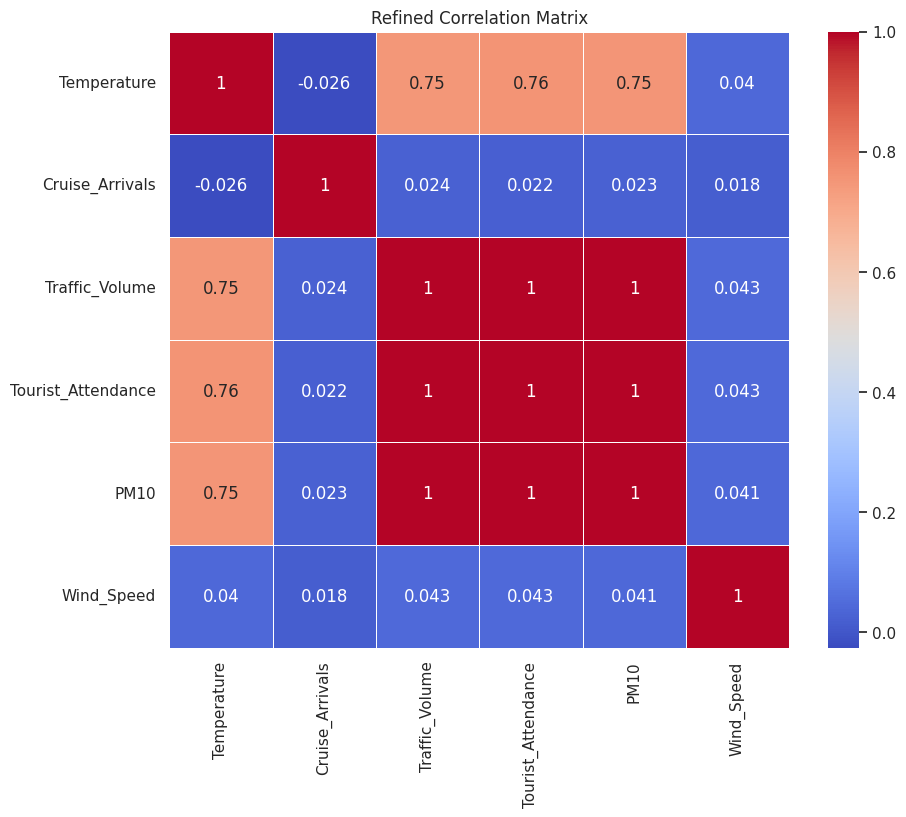

In [92]:
import numpy as np
import pandas as pd

# Ensure the dataset is loaded and structured correctly
# Adjust the DataFrame if needed for these correlations
np.random.seed(42)  # For reproducibility

# 1. Refine Tourist Attendance based on Events and Seasonality
df_simulation['Tourist_Attendance'] = np.where(
    (df_simulation['Event_Saint_Efisio'] == 1),
    df_simulation['Tourist_Attendance'] * 1.5,  # 50% increase during the event
    df_simulation['Tourist_Attendance']
)

df_simulation['Tourist_Attendance'] = np.where(
    df_simulation['Season'] == 'Summer',
    df_simulation['Tourist_Attendance'] * 1.3,  # 30% increase in summer
    df_simulation['Tourist_Attendance']
)

# 2. Refine Traffic Volume based on Cruise Arrivals and Events
df_simulation['Traffic_Volume'] = (0.6 * df_simulation['Tourist_Attendance'] +
                                   0.7 * df_simulation['Cruise_Arrivals'] +
                                   np.where(df_simulation['Event_Saint_Efisio'] == 1, 1.5, 1.0) +
                                   np.random.normal(0, 0.2, len(df_simulation)))

# 3. Refine PM10 Levels based on Traffic Volume and Weather Conditions (Temperature, Wind Speed)
# PM levels increase with higher traffic and temperature, and decrease with higher wind speeds
df_simulation['PM10'] = (20 +
                         0.5 * df_simulation['Traffic_Volume'] +
                         0.3 * df_simulation['Temperature'] -
                         0.2 * df_simulation['Wind_Speed'] +
                         np.random.normal(0, 5, len(df_simulation)))

# 4. Correlate Tourist Attendance with Temperature (stronger effect during the summer)
df_simulation['Tourist_Attendance'] += np.where(
    (df_simulation['Season'] == 'Summer') & (df_simulation['Temperature'] > 25),
    df_simulation['Temperature'] * 2, 0)

# Display the updated correlation matrix
correlation_matrix_refined = df_simulation[['Temperature', 'Cruise_Arrivals', 'Traffic_Volume',
                                            'Tourist_Attendance', 'PM10', 'Wind_Speed']].corr()

import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix_refined, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Refined Correlation Matrix')
plt.show()


Improving the Labels for Overtourism and Environmental Hazard:

In [93]:
# Set realistic thresholds for overtourism and environmental hazard
overtourism_threshold_attendance = 2500
overtourism_threshold_cruise_arrivals = 4
overtourism_threshold_hotel_occupancy = 90
environmental_hazard_threshold_pm10 = 60
environmental_hazard_threshold_traffic = 3
temperature_threshold = 35

# Create the overtourism label based on improved conditions
df_simulation['Overtourism'] = np.where(
    (df_simulation['Tourist_Attendance'] > overtourism_threshold_attendance) &
    (df_simulation['Cruise_Arrivals'] > overtourism_threshold_cruise_arrivals) &
    (df_simulation['Hotel_Occupancy'] > overtourism_threshold_hotel_occupancy), 1, 0
)

# Create the environmental hazard label with improved thresholds
df_simulation['Environmental_Hazard'] = np.where(
    (df_simulation['PM10'] > environmental_hazard_threshold_pm10) &
    (df_simulation['Traffic_Volume'] > environmental_hazard_threshold_traffic) &
    (df_simulation['Temperature'] > temperature_threshold), 1, 0
)

# Create a critical alert label if both overtourism and environmental hazard occur simultaneously
df_simulation['Critical_Alert'] = np.where(
    (df_simulation['Overtourism'] == 1) &
    (df_simulation['Environmental_Hazard'] == 1), 1, 0
)

# Display the counts of each label type
overtourism_count = df_simulation['Overtourism'].sum()
environmental_hazard_count = df_simulation['Environmental_Hazard'].sum()
critical_alert_count = df_simulation['Critical_Alert'].sum()

print(f"Overtourism instances: {overtourism_count}")
print(f"Environmental Hazard instances: {environmental_hazard_count}")
print(f"Critical Alert instances: {critical_alert_count}")


Overtourism instances: 4
Environmental Hazard instances: 19
Critical Alert instances: 1


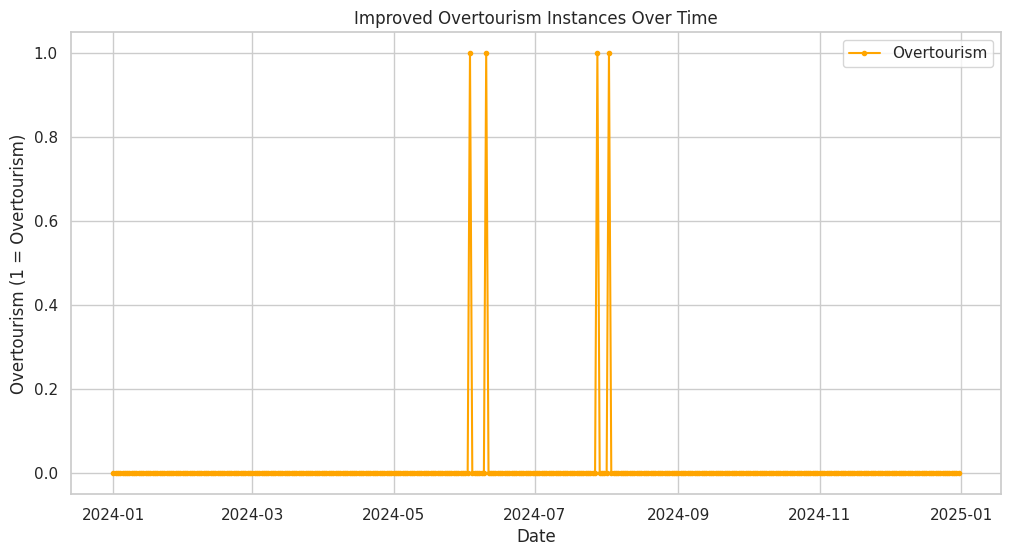

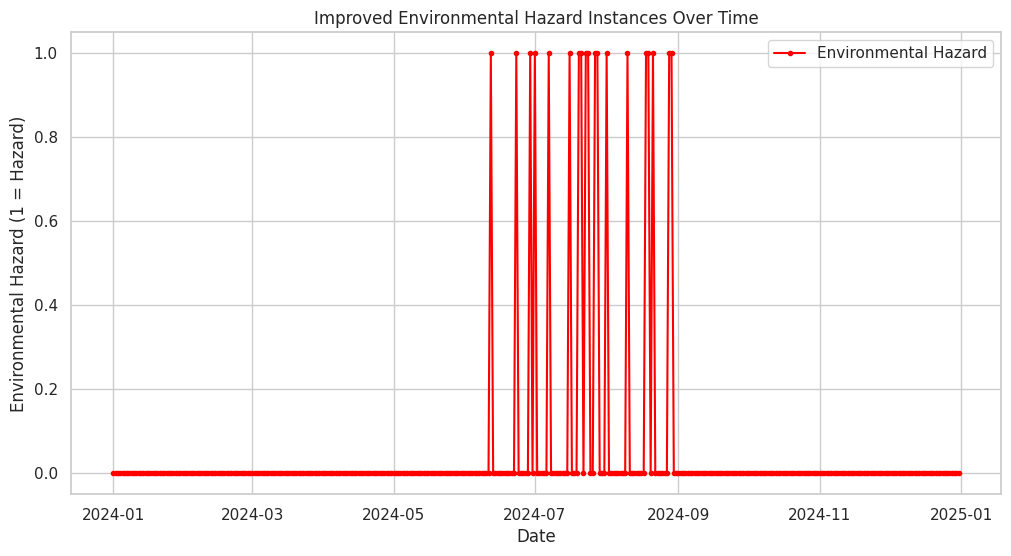

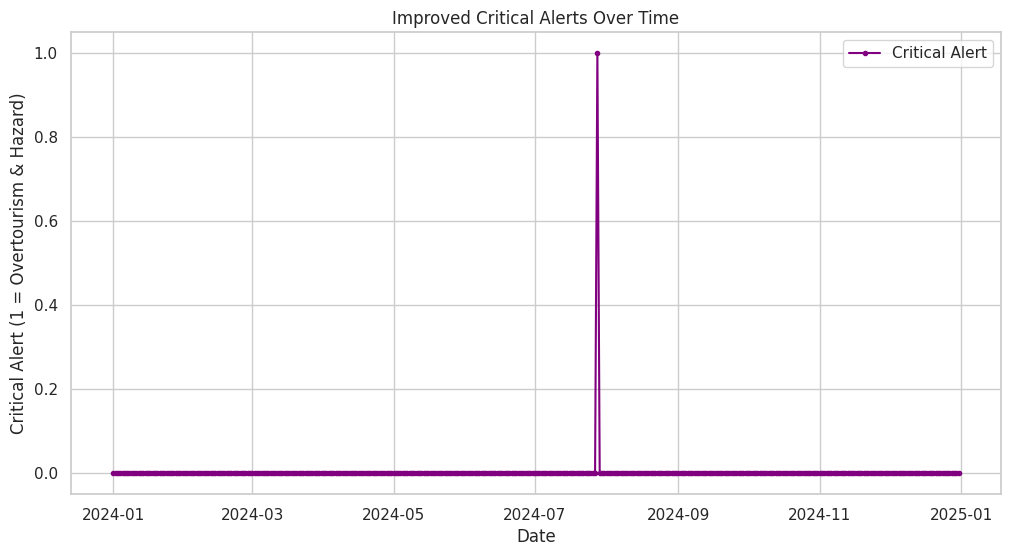

In [94]:
import matplotlib.pyplot as plt

# Visualize the instances of overtourism over time
plt.figure(figsize=(12, 6))
plt.plot(df_simulation['Date'], df_simulation['Overtourism'], label='Overtourism', color='orange', linestyle='-', marker='.')
plt.xlabel('Date')
plt.ylabel('Overtourism (1 = Overtourism)')
plt.title('Improved Overtourism Instances Over Time')
plt.legend()
plt.show()

# Visualize the instances of environmental hazards over time
plt.figure(figsize=(12, 6))
plt.plot(df_simulation['Date'], df_simulation['Environmental_Hazard'], label='Environmental Hazard', color='red', linestyle='-', marker='.')
plt.xlabel('Date')
plt.ylabel('Environmental Hazard (1 = Hazard)')
plt.title('Improved Environmental Hazard Instances Over Time')
plt.legend()
plt.show()

# Visualize the instances of critical alerts over time
plt.figure(figsize=(12, 6))
plt.plot(df_simulation['Date'], df_simulation['Critical_Alert'], label='Critical Alert', color='purple', linestyle='-', marker='.')
plt.xlabel('Date')
plt.ylabel('Critical Alert (1 = Overtourism & Hazard)')
plt.title('Improved Critical Alerts Over Time')
plt.legend()
plt.show()


# **Final**

Structuring the Comprehensive Dataset

In [1]:
import pandas as pd
import numpy as np

# Create the date range and basic structure
date_range = pd.date_range(start='2023-01-01', end='2024-12-31', freq='D')
df_final = pd.DataFrame(date_range, columns=['Date'])

# Define month and season
df_final['Month'] = df_final['Date'].dt.month
df_final['Season'] = np.where(df_final['Month'].isin([6, 7, 8]), 'Summer',
                              np.where(df_final['Month'].isin([9, 10]), 'Fall',
                                       np.where(df_final['Month'].isin([3, 4, 5]), 'Spring', 'Winter')))

df_final['Temperature'] = np.where(df_final['Season'] == 'Summer',
                                   np.random.normal(30, 5, len(df_final)),
                                   np.where(df_final['Season'] == 'Winter',
                                            np.random.normal(15, 3, len(df_final)),
                                            np.random.normal(20, 4, len(df_final))))


# 1. Tourist Attendance and Cruise Ship Arrivals
df_final['Tourist_Attendance'] = np.where(
    df_final['Season'] == 'Summer',
    np.random.normal(2500, 500, len(df_final)),  # Higher attendance in summer
    np.random.normal(1500, 300, len(df_final))
)



df_final['Water_Usage'] = (300 + 0.3 * df_final['Tourist_Attendance'] +
                           np.where(df_final['Season'] == 'Summer', 100, 50) +
                           np.random.normal(20, 10, len(df_final)))

df_final['Energy_Usage'] = (400 + 0.4 * df_final['Tourist_Attendance'] +
                            np.where(df_final['Season'] == 'Summer', 200, 100) +
                            np.random.normal(30, 15, len(df_final)))

df_final['Cruise_Arrivals'] = np.random.poisson(2, len(df_final))  # Poisson distribution for arrivals


# 2. Events: Saint Efisio, Cultural Festivals, and Concerts
df_final['Event_Saint_Efisio'] = np.where((df_final['Month'] == 5) & (df_final['Date'].dt.day == 1), 1, 0)
df_final['Event_Cultural_Festival'] = np.where((df_final['Season'].isin(['Spring', 'Summer'])) &
                                               (np.random.rand(len(df_final)) < 0.05), 1, 0)
df_final['Event_Concert'] = np.where(np.random.rand(len(df_final)) < 0.03, 1, 0)

# 3. Hotel Occupancy and Beach Occupancy
df_final['Hotel_Occupancy'] = np.where(df_final['Season'] == 'Summer',
                                       np.random.normal(90, 5, len(df_final)),
                                       np.random.normal(75, 10, len(df_final)))

df_final['Beach_Occupancy'] = np.where(
    df_final['Season'] == 'Summer',
    df_final['Tourist_Attendance'] * 0.6 + df_final['Temperature'] * 5 + np.random.normal(50, 20, len(df_final)),
    df_final['Tourist_Attendance'] * 0.2 + np.random.normal(20, 10, len(df_final))
)

df_final['Humidity'] = np.random.normal(60, 10, len(df_final))
df_final['Wind_Speed'] = np.random.normal(5, 1.5, len(df_final))

# 4. Environmental Metrics: PM Levels and Other Pollutants
df_final['PM10'] = (30 + 0.5 * df_final['Cruise_Arrivals'] +
                    0.3 * df_final['Tourist_Attendance'] -
                    0.2 * df_final['Wind_Speed'] +
                    np.random.normal(0, 5, len(df_final)))

df_final['PM2.5'] = df_final['PM10'] * 0.6 + np.random.normal(0, 2, len(df_final))
df_final['CO'] = np.random.normal(0.6, 0.2, len(df_final))
df_final['NO2'] = np.random.normal(20, 5, len(df_final))

# 2. Refine Traffic Volume based on Cruise Arrivals and Events
df_final['Traffic_Volume'] = (0.6 * df_final['Tourist_Attendance'] +
                                   0.7 * df_final['Cruise_Arrivals'] +
                                   np.where(df_final['Event_Saint_Efisio'] == 1, 1.5, 1.0) +
                                   np.random.normal(0, 0.2, len(df_final)))

# 5. Noise Pollution
df_final['Noise_Level'] = (50 + 10 * df_final['Traffic_Volume'] +
                           20 * (df_final['Event_Saint_Efisio'] + df_final['Event_Cultural_Festival'] + df_final['Event_Concert']) +
                           np.random.normal(0, 5, len(df_final)))



# 7. Infrastructure Metrics: Public Transportation, Water, and Energy Usage
df_final['Public_Transport_Usage'] = (500 + 0.5 * df_final['Tourist_Attendance'] +
                                      100 * (df_final['Event_Saint_Efisio'] + df_final['Event_Cultural_Festival']) +
                                      np.random.normal(50, 20, len(df_final)))


# Display the first few rows of the comprehensive dataset
df_final.head()


,Date,Month,Season,Temperature,Tourist_Attendance,Water_Usage,Energy_Usage,Cruise_Arrivals,Event_Saint_Efisio,Event_Cultural_Festival,...,Beach_Occupancy,Humidity,Wind_Speed,PM10,PM2.5,CO,NO2,Traffic_Volume,Noise_Level,Public_Transport_Usage
0,2023-01-01,1,Winter,15.431424,1797.556646,905.802688,1223.787767,2,0,0,...,359.729945,66.576874,4.069867,572.812158,345.133594,0.982872,18.303283,1081.069250,10852.740713,1464.334736
1,2023-01-02,1,Winter,17.984173,1518.631479,816.040828,1129.531291,3,0,0,...,325.203635,49.783772,7.229452,489.173862,293.558664,0.326592,15.444194,914.567438,9199.024681,1316.878326
2,2023-01-03,1,Winter,14.147634,1607.373350,875.672836,1206.258281,1,0,0,...,347.955057,61.624680,5.583716,503.768604,301.195449,0.490162,20.421281,965.739951,9704.049412,1331.066834
3,2023-01-04,1,Winter,14.361902,1756.043982,904.544391,1237.882770,3,0,0,...,369.067543,64.102299,3.365257,564.344207,339.103349,0.695525,24.033562,1056.791532,10622.543772,1418.364614
4,2023-01-05,1,Winter,14.207172,1573.023700,849.511038,1165.637105,1,0,0,...,332.024123,66.806082,4.858042,501.795659,300.838899,0.518910,23.683213,945.383951,9517.021572,1327.492361


In [2]:
# Define updated thresholds for overtourism and environmental hazard
overtourism_threshold_attendance = 3000
overtourism_threshold_cruise_arrivals = 4
overtourism_threshold_hotel_occupancy = 85
environmental_hazard_threshold_pm10 = 60
environmental_hazard_threshold_noise = 80

# Improved Overtourism Label
df_final['Overtourism'] = np.where(
    (df_final['Tourist_Attendance'] > overtourism_threshold_attendance) &
    (df_final['Cruise_Arrivals'] > overtourism_threshold_cruise_arrivals) &
    (df_final['Hotel_Occupancy'] > overtourism_threshold_hotel_occupancy), 1, 0
)

# Improved Environmental Hazard Label
df_final['Environmental_Hazard'] = np.where(
    (df_final['PM10'] > environmental_hazard_threshold_pm10) &
    (df_final['Noise_Level'] > environmental_hazard_threshold_noise), 1, 0
)

# Critical Alert Label
df_final['Critical_Alert'] = np.where(
    (df_final['Overtourism'] == 1) &
    (df_final['Environmental_Hazard'] == 1), 1, 0
)

# Display the counts of each label type
print(f"Overtourism instances: {df_final['Overtourism'].sum()}")
print(f"Environmental Hazard instances: {df_final['Environmental_Hazard'].sum()}")
print(f"Critical Alert instances: {df_final['Critical_Alert'].sum()}")


Overtourism instances: 0
Environmental Hazard instances: 731
Critical Alert instances: 0


In [3]:
!pip install pennylane


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 21.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 930.0/930.0 kB 37.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.3/15.3 MB 36.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 67.8 MB/s eta 0:00:00


In [4]:
!pip install qiskit


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.8/4.8 MB 37.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 119.4/119.4 kB 9.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.7/49.7 kB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.7/49.7 MB 9.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 108.5/108.5 kB 5.3 MB/s eta 0:00:00


# **Building the Quantum Model**

In [5]:
import pennylane as qml
import numpy as np
import pandas as pd
from pennylane import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

# Load and preprocess the dataset
features = ['Tourist_Attendance', 'Cruise_Arrivals', 'Hotel_Occupancy', 'Traffic_Volume',
            'PM10', 'PM2.5', 'CO', 'NO2', 'Temperature', 'Wind_Speed', 'Water_Usage',
            'Energy_Usage', 'Noise_Level']

# Normalize features
scaler = MinMaxScaler()
df_final[features] = scaler.fit_transform(df_final[features])

# Define the input and output
X = df_final[features].values
y_overtourism = df_final['Overtourism'].values
y_environmental = df_final['Environmental_Hazard'].values

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y_overtourism, test_size=0.2, random_state=42)

# Define the number of qubits
n_qubits = len(features)
dev = qml.device("default.qubit", wires=n_qubits)

# Define a QML circuit
def circuit(weights, x):
    qml.templates.AngleEmbedding(x, wires=range(n_qubits))
    qml.templates.StronglyEntanglingLayers(weights, wires=range(n_qubits))
    return [qml.expval(qml.PauliZ(i)) for i in range(n_qubits)]

# Create the quantum node
@qml.qnode(dev)
def quantum_classifier(weights, x):
    return circuit(weights, x)

# Define a simple variational classifier
def variational_classifier(weights, x):
    q_results = quantum_classifier(weights, x)
    return np.sum(q_results)

# Initialize weights randomly
weights_shape = (3, n_qubits, 3)  # Example shape for the layers
weights = np.random.randn(*weights_shape)

# Loss function and optimizer
def square_loss(y_pred, y_true):
    return np.mean((y_pred - y_true) ** 2)

opt = qml.GradientDescentOptimizer(stepsize=0.01)

# Training function
def train(weights, X, y, epochs=2):
    for epoch in range(epochs):
        for x, target in zip(X, y):
            weights, cost = opt.step_and_cost(lambda w: square_loss(variational_classifier(w, x), target), weights)
        if epoch % 10 == 0:
            print(f"Epoch {epoch} | Cost: {cost}")
    return weights

# Train the model
trained_weights = train(weights, X_train, y_train)


Epoch 0 | Cost: 1.0042943234027465e-06


In [6]:
# Evaluate the trained model
def evaluate(weights, X, y):
    predictions = [variational_classifier(weights, x) for x in X]
    predictions = np.round(predictions)  # Round to 0 or 1 for binary classification
    accuracy = np.mean(predictions == y)
    return accuracy

accuracy = evaluate(trained_weights, X_test, y_test)
print(f"Model Accuracy: {accuracy:.2f}")


Model Accuracy: 1.00


In [11]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np

# Select features relevant for time series forecasting
features = ['Tourist_Attendance', 'Cruise_Arrivals', 'Hotel_Occupancy', 'Traffic_Volume',
            'PM10', 'PM2.5', 'CO', 'NO2', 'Temperature', 'Wind_Speed', 'Water_Usage',
            'Energy_Usage', 'Noise_Level']

# Normalize features
scaler = MinMaxScaler()
df_final[features] = scaler.fit_transform(df_final[features])

# Define the input and output
X = df_final[features].values
y_overtourism = df_final['Overtourism'].values
y_environmental = df_final['Environmental_Hazard'].values

# Function to create time series sequences
def create_sequences(data, labels, sequence_length):
    X_seq, y_seq = [], []
    for i in range(len(data) - sequence_length):
        X_seq.append(data[i:i+sequence_length])
        y_seq.append(labels[i+sequence_length])
    return np.array(X_seq), np.array(y_seq)

# Define sequence length (e.g., 30 days)
sequence_length = 30

# Create sequences for overtourism prediction
X_seq, y_seq = create_sequences(X, y_overtourism, sequence_length)

# Split the data into training and test sets
split_ratio = 0.8
split_index = int(len(X_seq) * split_ratio)
X_train, X_test = X_seq[:split_index], X_seq[split_index:]
y_train, y_test = y_seq[:split_index], y_seq[split_index:]


# **QRNN**

In [12]:
import pennylane as qml
from pennylane import numpy as np

# Define the number of qubits and the device
n_qubits = X_train.shape[2]  # Each feature is represented by a qubit
dev = qml.device("default.qubit", wires=n_qubits)

# Define the quantum node for the RNN
@qml.qnode(dev)
def quantum_rnn(weights, x):
    qml.templates.AngleEmbedding(x, wires=range(n_qubits))
    qml.templates.StronglyEntanglingLayers(weights, wires=range(n_qubits))
    return [qml.expval(qml.PauliZ(i)) for i in range(n_qubits)]

# Define the QRNN layer
def qrnn_layer(weights, x):
    q_output = quantum_rnn(weights, x)
    return np.tanh(np.sum(q_output))  # Activation function for output

# Initialize weights for the quantum layer
weights_shape = (3, n_qubits, 3)  # Example shape for the layers
weights = np.random.randn(*weights_shape)

# Loss function and optimizer
def mean_squared_error(y_pred, y_true):
    return np.mean((y_pred - y_true) ** 2)

opt = qml.GradientDescentOptimizer(stepsize=0.01)

# Training function
def train_qrnn(weights, X, y, epochs=50):
    for epoch in range(epochs):
        for x_seq, target in zip(X, y):
            weights, cost = opt.step_and_cost(lambda w: mean_squared_error(qrnn_layer(w, x_seq[-1]), target), weights)
        if epoch % 10 == 0:
            print(f"Epoch {epoch} | Cost: {cost}")
    return weights

# Train the model
trained_weights = train_qrnn(weights, X_train, y_train)


Epoch 0 | Cost: 0.0018316106326346192
Epoch 10 | Cost: 0.0003706294719608562
Epoch 20 | Cost: 0.00011086944753311251
Epoch 30 | Cost: 4.302642692826561e-05
Epoch 40 | Cost: 2.0580117264331095e-05


# **Prediction for the next day**

In [14]:
# Function to make predictions using the trained QRNN model on sequences
def qrnn_predict(weights, X_seq):
    # Make predictions for each sequence in the test set
    predictions = []
    for x_seq in X_seq:
        # Pass the last time step in each sequence through the QRNN layer
        prediction = qrnn_layer(weights, x_seq[-1])
        predictions.append(prediction)
    return predictions

# Function to determine overtourism and environmental hazard based on model predictions
def classify_based_on_thresholds(weights, X_seq):
    overtourism_preds = []
    environmental_preds = []
    critical_alert_preds = []

    for x_seq in X_seq:
        # Use the trained QRNN model to make predictions for each feature of interest
        tourist_attendance = x_seq[-1, 0]  # Last day's Tourist_Attendance in the sequence
        cruise_arrivals = x_seq[-1, 1]     # Last day's Cruise_Arrivals in the sequence
        hotel_occupancy = x_seq[-1, 2]     # Last day's Hotel_Occupancy
        pm10 = x_seq[-1, 4]                # Last day's PM10
        noise_level = x_seq[-1, -1]        # Last day's Noise_Level

        # Check overtourism conditions
        overtourism = (tourist_attendance > overtourism_threshold_attendance) and \
                      (cruise_arrivals > overtourism_threshold_cruise_arrivals) and \
                      (hotel_occupancy > overtourism_threshold_hotel_occupancy)

        # Check environmental hazard conditions
        environmental_hazard = (pm10 > environmental_hazard_threshold_pm10) and \
                               (noise_level > environmental_hazard_threshold_noise)

        # Determine if a critical alert should be issued
        critical_alert = overtourism and environmental_hazard

        # Append predictions for each category
        overtourism_preds.append(int(overtourism))
        environmental_preds.append(int(environmental_hazard))
        critical_alert_preds.append(int(critical_alert))

    return overtourism_preds, environmental_preds, critical_alert_preds

# Make predictions using the trained QRNN model and the test set
overtourism_predictions, environmental_predictions, critical_alert_predictions = classify_based_on_thresholds(trained_weights, X_test)

# Count the number of instances for each label type
overtourism_count = sum(overtourism_predictions)
environmental_hazard_count = sum(environmental_predictions)
critical_alert_count = sum(critical_alert_predictions)

print(f"Predicted Overtourism instances: {overtourism_count}")
print(f"Predicted Environmental Hazard instances: {environmental_hazard_count}")
print(f"Predicted Critical Alert instances: {critical_alert_count}")


Predicted Overtourism instances: 0
Predicted Environmental Hazard instances: 0
Predicted Critical Alert instances: 0


# **Prediction for the next 30 days**

In [17]:
# Define the QRNN layer
def qrnn_layer(weights, x):
    q_output = quantum_rnn(weights, x)
    return q_output  # Return the quantum output as an array of features


In [18]:
def forecast_next_days(weights, initial_sequence, num_days):
    # Create a list to hold the generated sequences and predictions
    forecasted_sequence = initial_sequence.copy()  # Start with the last sequence
    predicted_overtourism = []
    predicted_environmental_hazard = []
    predicted_critical_alert = []

    for _ in range(num_days):
        # Use the last sequence in forecasted_sequence to make a prediction
        next_day_features = qrnn_layer(weights, forecasted_sequence[-1])

        # Ensure next_day_features is an array of the same shape as each time step
        next_day_features = np.array(next_day_features)

        # Check conditions for overtourism and environmental hazard
        tourist_attendance = next_day_features[0]  # Tourist Attendance
        cruise_arrivals = next_day_features[1]     # Cruise Arrivals
        hotel_occupancy = next_day_features[2]     # Hotel Occupancy
        pm10 = next_day_features[4]                # PM10
        noise_level = next_day_features[-1]        # Noise Level

        overtourism = (tourist_attendance > overtourism_threshold_attendance) and \
                      (cruise_arrivals > overtourism_threshold_cruise_arrivals) and \
                      (hotel_occupancy > overtourism_threshold_hotel_occupancy)

        environmental_hazard = (pm10 > environmental_hazard_threshold_pm10) and \
                               (noise_level > environmental_hazard_threshold_noise)

        critical_alert = overtourism and environmental_hazard

        # Append predictions for each category
        predicted_overtourism.append(int(overtourism))
        predicted_environmental_hazard.append(int(environmental_hazard))
        predicted_critical_alert.append(int(critical_alert))

        # Update the forecasted_sequence to include the new day and remove the oldest
        new_sequence = np.vstack((forecasted_sequence[1:], next_day_features.reshape(1, -1)))
        forecasted_sequence = new_sequence

    return predicted_overtourism, predicted_environmental_hazard, predicted_critical_alert

# Use the last sequence from the test set as the starting point
initial_sequence = X_test[-1]  # Last sequence from the test set

# Forecast for the next 30 days
overtourism_forecast, environmental_hazard_forecast, critical_alert_forecast = forecast_next_days(
    trained_weights, initial_sequence, num_days=30
)

# Display the results
print("Overtourism Forecast for the Next 30 Days:", overtourism_forecast)
print("Environmental Hazard Forecast for the Next 30 Days:", environmental_hazard_forecast)
print("Critical Alert Forecast for the Next 30 Days:", critical_alert_forecast)


Overtourism Forecast for the Next 30 Days: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Environmental Hazard Forecast for the Next 30 Days: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Critical Alert Forecast for the Next 30 Days: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
